In [1]:
# ÏΩîÎû©Ïù¥ÎÇò Ï∫êÍ∏ÄÏùÑ ÏÇ¨Ïö©ÌïúÎã§Î©¥ Ïù¥ ÏÖÄÏùò Ï£ºÏÑùÏùÑ Ï†úÍ±∞ÌïòÍ≥† Ïã§ÌñâÌïòÏÑ∏Ïöî.
!git clone https://github.com/rickiepark/nlp-with-transformers.git
%cd nlp-with-transformers
from install import *
install_requirements(chapter=8)

fatal: destination path 'nlp-with-transformers' already exists and is not an empty directory.
/home/jj/github/NLP/nlp-with-transformers
‚è≥ Installing base requirements ...
‚úÖ Base requirements installed!
Using transformers v4.31.0
Using datasets v2.10.1
Using accelerate v0.21.0
Using optuna v3.2.0
Using onnxruntime v1.15.1
Using onnx v1.14.0


# 8Ïû•
ÏßÄÏãùÏ†ïÏ†ú,  
ÎèôÏ†Å Ìå®Îî©,  
Í∞ÄÏ§ëÏπò ÏñëÏûêÌôî,  
Í∞ÄÏßÄÏπòÍ∏∞,  
ONNX Ìè¨Îß∑Í≥º ONNX Îü∞ÌÉÄÏûÑ(ORT)ÏùÑ ÏÇ¨Ïö©Ìïú Í∑∏ÎûòÌîÑ ÏµúÏ†ÅÌôî

# 8.1 ÏùòÎèÑ ÌÉêÏßÄ

In [2]:
from transformers import pipeline

bert_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=bert_ckpt)

In [3]:
# Ï§ÄÎπÑÌïú ÌååÏù¥ÌîÑÎùºÏù∏Ïóê ÏøºÎ¶¨Î•º Ï†ÑÎã¨Ìï¥ Î™®Îç∏Î°úÎ∂ÄÌÑ∞ ÏòàÏ∏°Ìïú ÏùòÎèÑÏôÄ Ïã†Î¢∞ÎèÑ Ï†êÏàòÎ•º ÏñªÎäîÎã§.

query = """Hey, I'd like to rent a vehicle from Nov 1st to Nov 15th in 
Paris and I need a 15 passenger van"""
pipe(query)

[{'label': 'car_rental', 'score': 0.5490034222602844}]

# 8.2 Í∏∞Ï§Ä Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† Î≤§ÏπòÎßàÌÅ¨ ÌÅ¥ÎûòÏä§ ÎßåÎì§Í∏∞

Ïã†Í≤ΩÏç®Ïïº Ìï† Ï°∞Í±¥ 3Í∞ÄÏßÄ  
1. Î™®Îç∏ ÏÑ±Îä•  
2. Î†àÏù¥ÌÑ¥Ïãú  
3. Î©îÎ™®Î¶¨  
  
Ïù¥Îü∞ Ï†úÏïΩ Ï°∞Í±¥ÏùÑ Ìï¥Í≤∞ÌïòÏßÄ Î™ªÌïòÎ©¥ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏùò ÏÇ¨Ïö©Ïûê Í≤ΩÌóòÏóê Î∂ÄÏ†ïÏ†Å ÏòÅÌñ•ÏùÑ ÎØ∏Ïπ®

### ÌååÏù¥ÌîÑÎùºÏù∏Í≥º ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Í∞Ä Ï£ºÏñ¥ÏßÄÎ©¥ ÏÑ±Îä•ÏùÑ Ï∏°Ï†ïÌïòÎäî Í∞ÑÎã®Ìïú Î≤§ÏπòÎßàÌÅ¨ ÌÅ¥ÎûòÏä§

In [4]:
class PerformanceBenchmark:
    def __init__(self, pipeline, dataset, optim_type="BERT baseline"):
        self.pipeline = pipeline
        self.dataset = dataset
        self.optim_type = optim_type
    
    def compute_accuracy(self):
        # ÎÇòÏ§ëÏóê Ï†ïÏùòÌïúÎã§.
        pass
    
    def compute_size(self):
        # ÎÇòÏ§ëÏóê Ï†ïÏùòÌïúÎã§.
        pass
    
    def time_pipeline(self):
        # ÎÇòÏ§ëÏóê Ï†ïÏùòÌïúÎã§.
        pass

    # optim_typeÏùÑ ÌÇ§Î°ú Î™®Îì† ÏßÄÌëúÎ•º Ï†ÄÏû•
    def run_benchmark(self):
        metrics = {}
        metrics[self.optim_type] = self.compute_size()
        metrics[self.optim_type].update(self.time_pipeline()) # ÎîïÏÖîÎÑàÎ¶¨Ïùò update Î©îÏÑúÎìúÎäî ÏÉàÎ°úÏö¥ 'keyÏôÄ value'Î•º Ï∂îÍ∞ÄÌïòÍ±∞ÎÇò ÏàòÏ†ï
        metrics[self.optim_type].update(self.compute_accuracy())
        return metrics

In [5]:
from datasets import load_dataset

clinc = load_dataset("clinc_oos", "plus") # plus ÏÑ§Ï†ïÏùÄ Î≤îÏúÑ Î∞ñÏùò ÌõàÎ†® ÏÉòÌîåÏù¥ Îã¥Í∏¥ ÏÑúÎ∏åÏÖãÏùÑ ÏùòÎØ∏Ìï®

  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
sample = clinc["test"][42]
sample

{'text': 'transfer $100 from my checking to saving account', 'intent': 133}

ÏùòÎèÑintentÎäî IDÎ°ú Ï†úÍ≥µÎê®.  
Îã§Îßå feature ÏÜçÏÑ±ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Î¨∏ÏûêÏó¥Î°ú(Í∑∏Î¶¨Í≥† Î∞òÎåÄÎ°úÎèÑ) ÏâΩÍ≤å Îß§Ìïë Í∞ÄÎä•ÌïòÎã§.

In [7]:
intents = clinc["test"].features["intent"]
intents.int2str(sample["intent"])

'transfer'

PerformanceBenchmarkÏùò compute_accuracy() Î©îÏÑúÎìúÎ•º Íµ¨ÌòÑÌï¥Î≥¥Ïûê.  
Ïù¥ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏùòÎèÑ ÌÅ¥ÎûòÏä§ Í∞ÑÏóê Í∑†ÌòïÏù¥ Ïû°ÌòÄ ÏûàÏúºÎãà(42Îßå 250Í∞ú ÎÇòÎ®∏ÏßÄÎäî 100Í∞úÏî© Ï°¥Ïû¨, Ï¥ù 151Í∞úÏùò ÌÅ¥ÎûòÏä§ 0~150) ÏÑ±Îä• ÏßÄÌëúÎ°ú accuracyÎ•º ÏÇ¨Ïö©

In [8]:
from datasets import load_metric

accuracy_score = load_metric("accuracy")

/tmp/ipykernel_1484/3510557904.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library ü§ó Evaluate: https://huggingface.co/docs/evaluate
  accuracy_score = load_metric("accuracy")


### ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÏÇ¨Ïö©Ìï¥ text ÌïÑÎìúÏóêÏÑú ÏòàÏ∏°ÏùÑ Ï∂îÏ∂úÌïòÍ≥†, intents Í∞ùÏ≤¥Ïùò str2int() Î©îÏÑúÎìúÎ•º ÏÇ¨Ïö©Ìï¥ Í∞Å ÏòàÏ∏°ÏùÑ Ìï¥Îãπ IDÎ°ú Îß§ÌïëÌïúÎã§.

In [9]:
def compute_accuracy(self):
    """PerformanceBenchmar.compute_accuracy() Î©îÏÑúÎìúÎ•º Ïò§Î≤ÑÎùºÏù¥ÎìúÌïúÎã§."""
    preds, labels = [], []
    for example in self.dataset:
        pred = self.pipeline(example["text"])[0]["label"]
        label = example["intent"]
        preds.append(intents.str2int(pred))
        labels.append(label)
    accuracy = accuracy_score.compute(predictions=preds, references=labels)
    print(f"ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - {accuracy['accuracy']:.3f}")
    return accuracy

PerformanceBenchmark.compute_accuracy = compute_accuracy

In [10]:
list(pipe.model.state_dict().items())[42]

('bert.encoder.layer.2.attention.self.value.bias',
 tensor([-2.7834e-02,  4.9434e-02,  8.3551e-02,  4.1092e-02,  6.0157e-01,
          1.1774e-01, -5.2112e-02, -6.5143e-02, -2.9358e-02, -4.2250e-02,
          7.9177e-02,  8.0409e-02,  2.9921e-03,  1.7816e-01, -5.0480e-02,
         -1.5634e-01, -2.1707e-02,  1.4381e-02,  2.5132e-02, -2.4110e-02,
         -1.9183e-01, -7.8657e-02,  5.0709e-02,  3.3632e-02, -3.1946e-02,
          1.1616e-01,  9.2720e-02, -1.1787e-01,  2.3233e-01, -1.2678e-02,
         -1.3138e-01, -4.0024e-02,  7.4823e-02, -5.4148e-02, -1.5184e-01,
         -7.4407e-02,  1.1559e-01,  8.2729e-02, -1.3787e-01,  8.3528e-02,
          1.2154e-01,  1.6880e-02, -5.6629e-02, -3.9295e-02,  5.3725e-02,
          6.8602e-02, -1.1294e-01,  4.4001e-02, -2.5884e-01,  1.6767e-01,
          1.8316e-01,  5.6272e-02, -3.6874e-02, -2.7938e-02, -9.3204e-02,
         -7.5239e-03,  4.1141e-02, -1.1542e-02, -9.9749e-02, -3.0910e-02,
          4.1398e-02, -4.4389e-02, -2.6279e-02,  7.2100e-02, 

Í∞ÅÍ∞ÅÏùò ÌÇ§/Í∞í ÏåçÏù¥ BERTÏùò Ï∏µÍ≥º ÌÖêÏÑúÏóê Ìï¥ÎãπÌïúÎã§.

In [11]:
# torch.save(pipe.model.state_dict(), "model.pt")

ÌååÏù¥Ïç¨Ïùò pathlib Î™®ÎìàÏùò Path.stat() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ Ï†ÄÏû•Îêú ÌååÏùºÏùò Ï†ïÎ≥¥Î•º ÏñªÎäîÎã§.  
Path("model.pt").stat().st_sizeÏóêÎäî Î™®Îç∏ ÌÅ¨Í∏∞Í∞Ä Î∞îÏù¥Ìä∏ Îã®ÏúÑÎ°ú Ï†ÄÏû•ÎêêÎã§.

In [12]:
import torch
from pathlib import Path

def compute_size(self):
    """PerformanceBenchmark.compute_size() Î©îÏÑúÎìúÎ•º Ïò§Î≤ÑÎùºÏù¥ÎìúÌï©ÎãàÎã§"""
    state_dict = self.pipeline.model.state_dict()
    tmp_path = Path("model.pt")
    torch.save(state_dict, tmp_path)
    # Î©îÍ∞ÄÎ∞îÏù¥Ìä∏ Îã®ÏúÑÎ°ú ÌÅ¨Í∏∞Î•º Í≥ÑÏÇ∞ÌïúÎã§.
    size_mb = Path(tmp_path).stat().st_size / (1024 * 1024)
    # ÏûÑÏãú ÌååÏùºÏùÑ ÏÇ≠Ï†úÌïúÎã§.
    tmp_path.unlink()
    print(f"Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - {size_mb:.2f}")
    return {"size_mb": size_mb}
    
PerformanceBenchmark.compute_size = compute_size

ÏøºÎ¶¨ÎßàÎã§ ÌèâÍ∑†Ï†ÅÏù∏ Î†àÏù¥ÌÑ¥ÏãúÎ•º Ïû¨Í∏∞ ÏúÑÌï¥ time_pipeline() Ìï®ÏàòÎ•º Íµ¨ÌòÑÌïúÎã§.

Ïù¥ Ïï†ÌîåÎ¶¨ÏºÄÏù¥ÏÖòÏóêÏÑú Î†àÏù¥ÌÑ¥ÏãúÎäî  
-> ÌååÏù¥ÌîÑÎùºÏù∏Ïóê ÌÖçÏä§Ìä∏ ÏøºÎ¶¨Î•º Ï£ºÏûÖÌïòÍ≥† Î™®Îç∏Î°úÎ∂ÄÌÑ∞ ÏòàÏ∏°Îêú ÏùòÎèÑÍ∞Ä Î∞òÌôòÎêòÍ∏∞ÍπåÏßÄ Í±∏Î¶∞ ÏãúÍ∞ÑÏùÑ ÏùòÎØ∏ÌïúÎã§.

ÌååÏù¥Ïç¨Ïùò time Î™®Îç∏Ïù¥ Ï†úÍ≥µÌïòÎäî perf_counter() Ìï®ÏàòÎäî time.time() Ìï®ÏàòÎ≥¥Îã§ Îçî ÎØ∏ÏÑ∏Ìïú ÏàòÏ§ÄÏúºÎ°ú ÏãúÍ∞ÑÏùÑ Ï∏°Ï†ïÌï¥ Ï†ïÎ∞ÄÌïú Í≤∞Í≥ºÎ•º ÏöîÌïòÎäî Í≥≥Ïóê Ï†ÅÌï©ÌïòÎã§.

In [13]:
from time import perf_counter

for _ in range(3):
    start_time = perf_counter()
    _ = pipe(query)
    latency = perf_counter() - start_time
    print(f"Î†àÏù¥ÌÑ¥Ïãú (ms) - {1000*latency:.3f}") # Ìï† Îïå ÎßàÎã§  Í∞íÏù¥ Î∞îÎÄú

Î†àÏù¥ÌÑ¥Ïãú (ms) - 35.202
Î†àÏù¥ÌÑ¥Ïãú (ms) - 29.625
Î†àÏù¥ÌÑ¥Ïãú (ms) - 29.490


### ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ïó¨Îü¨ Î≤à Ïã§ÌñâÌï¥ Î†àÏù¥ÌÑ¥ÏãúÎ•º ÏàòÏßëÌïòÍ≥† Í∑∏ Í≤∞Í≥ºÏùò ÌèâÍ∑†Í≥º ÌëúÏ§Ä Ìé∏Ï∞®Î•º Í≥ÑÏÇ∞Ìïú ÌõÑ, Î∂ÑÌè¨Î•º Íµ¨Ìï¥ Í∞íÏù¥ ÏñºÎßàÎÇò ÌçºÏ†∏ ÏûàÎäîÏßÄ ÌååÏïÖÌïúÎã§.

In [14]:
import numpy as np

def time_pipeline(self, query = "What is the pin number for my account?"):
    """PerformanceBenchmark.time_pipeline() Î©îÏÑúÎìúÎ•º Ïò§Î≤ÑÎùºÏù¥ÎìúÌï©ÎãàÎã§."""
    latencies = []
    
    # CPU ÏõåÎ∞çÏóÖ
    for _ in range(10):
        _ = self.pipeline(query)
    
    # Ïã§Ìñâ Ï∏°Ï†ï
    for _ in range(100):
        start_time = perf_counter()
        _ = self.pipeline(query)
        latency = perf_counter() - start_time
        latencies.append(latency)
    
    # ÌÜµÍ≥Ñ Í≥ÑÏÇ∞
    time_avg_ms = 1000 * np.mean(latencies)
    time_std_ms = 1000 * np.std(latencies)
    print(f"ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - {time_avg_ms:.2f} +\- {time_std_ms:.2f}")
    return {"time_avg_ms":time_avg_ms, "time_std_ms":time_std_ms}

PerformanceBenchmark.time_pipeline = time_pipeline

In [15]:
pb = PerformanceBenchmark(pipe, clinc["test"])
perf_metrics = pb.run_benchmark()

Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - 418.15
ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - 25.47 +\- 5.49
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - 0.867


ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú Í∞íÏùÄ ÏÇ¨Ïö©ÌïòÎäî ÌïòÎìúÏõ®Ïñ¥ Ï¢ÖÎ•òÏóê Îî∞Îùº Îã¨ÎùºÏßÑÎã§.  
ÏòàÎ•º Îì§Ïñ¥ GPUÏóêÏÑú Ï∂îÎ°†ÏùÑ Ïã§ÌñâÌïòÎ©¥ Î∞∞Ïπò Ï≤òÎ¶¨Í∞Ä Í∞ÄÎä•Ìï¥ÏÑú ÎåÄÍ∞úÎäî ÏÑ±Îä•Ïù¥ Ï¢ãÏïÑÏßÑÎã§.  
Ïù¥ Ïû•Ïùò Î™©Ï†ÅÏÉÅ Î™®Îç∏ Í∞ÑÏùò ÏÉÅÎåÄÏ†ÅÏù∏ Î†àÏù¥ÌÑ¥Ïãú Ï∞®Ïù¥Í∞Ä Ï§ëÏöîÌïòÎã§.  
ÏµúÏÉÅÏùò Î™®Îç∏ÏùÑ Í≤∞Ï†ïÌñàÎã§Î©¥ ÌïÑÏöîÏóê Îî∞Îùº Ï†ÅÏ†àÌïú ÌïòÎìúÏõ®Ïñ¥Î•º ÏÇ¨Ïö©Ìï¥ Î†àÏù¥ÌÑ¥ÏãúÏùò Ï†àÎåìÍ∞íÏùÑ Ï§ÑÏùº Ïàò ÏûàÎã§.

#### Í∏∞Ï§Ä Ï†êÏàòÎ•º ÏñªÏóàÏúºÎãà Ï≤´ Î≤àÏß∏ ÏïïÏ∂ï Í∏∞Ïà†Î°úÏÑú ÏßÄÏãù Ï†ïÏ†úÎ•º ÏÇ¥Ìé¥Î≥¥Ïûê.

# 8.3 ÏßÄÏãù Ï†ïÏ†úÎ°ú Î™®Îç∏ ÌÅ¨Í∏∞ Ï§ÑÏù¥Í∏∞

ÏßÄÏãù Ï†ïÏ†ú -> ÏûëÏùÄ student Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÎäî Î∞©Î≤ï  
ÎäêÎ¶¨Í≥† ÌÅ¨ÏßÄÎßå ÏÑ±Îä•Ïù¥ Îçî ÎÜíÏùÄ teacherÏùò ÎèôÏûëÏùÑ Î™®Î∞©ÌïòÎèÑÎ°ù ÏûëÏùÄ student Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïúÎã§.

## 8.3.1 ÎØ∏ÏÑ∏ ÌäúÎãùÏóêÏÑúÏùò ÏßÄÏãù Ï†ïÏ†ú
ÎØ∏ÏÑ∏ ÌäúÎãù Í∞ôÏùÄ ÏßÄÎèÑ ÌïôÏäµ ÏûëÏóÖÏóêÏÑúÎäî teacherÏùò ÏÜåÌîÑÌä∏ ÌôïÎ•†(soft probabilty)Î°ú Ï†ïÎãµ Î†àÏù¥Î∏îÏùÑ Î≥¥Í∞ïÌï¥ÏÑú studentÍ∞Ä ÌïôÏäµÌï† Îïå Î∂ÄÍ∞Ä Ï†ïÎ≥¥Î•º Ï†úÍ≥µÌïòÎäî Í≤ÉÏù¥ Ï£ºÏöî ÏïÑÏù¥ÎîîÏñ¥Îã§.

ÏòàÎ•º Îì§Ïñ¥, BERT Í∏∞Î∞ò Î∂ÑÎ•òÍ∏∞Í∞Ä Ïó¨Îü¨ Í∞úÏùò ÏùòÎèÑÏóê ÎÜíÏùÄ ÌôïÎ•†ÏùÑ Ìï†ÎãπÌïúÎã§Î©¥, Ïù¥ ÏùòÎèÑÎäî ÌäπÏÑ± Í≥µÍ∞Ñ ÏïàÏóêÏÑú ÏÑúÎ°ú Í∞ÄÍπåÏù¥ ÏúÑÏπòÌïúÎã§Îäî Ïã†Ìò∏Ïùº Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§.

Ïù¥Îü∞ ÌôïÎ•†ÏùÑ Î™®Î∞©ÌïòÎèÑÎ°ù studentÎ•º ÌõàÎ†®Ìï¥ÏÑú teacherÍ∞Ä ÌïôÏäµÌïú 'Í≤ÄÏùÄ ÏßÄÏãù(dark knowledge)'ÏùÑ Ï†ïÏ†úÌïúÎã§.  
‚Äª Í≤ÄÏùÄ ÏßÄÏãù: Î†àÏù¥Î∏îÎßåÏúºÎ°úÎäî ÏñªÏßÄ Î™ªÌïòÎäî ÏßÄÏãù

## 8.3.2 ÏÇ¨Ï†Ñ ÌõàÎ†®ÏóêÏÑúÏùò ÏßÄÏãù Ï†ïÏ†ú

ÏÇ¨Ï†Ñ ÌõàÎ†®ÌïòÎäî ÎèôÏïà ÌõÑÏÜç ÏûëÏóÖÏóêÏÑú ÎØ∏ÏÑ∏ ÌäúÎãùÏù¥ Í∞ÄÎä•Ìïú Î≤îÏö© Ïä§ÌäúÎçòÌä∏Î•º ÎßåÎì§Í∏∞ ÏúÑÌï¥ ÏßÄÏãù Ï†ïÏ†úÎ•º ÏÇ¨Ïö©Ìï† ÏàòÎèÑ ÏûàÎã§.

Ïù¥ Í≤ΩÏö∞ Ìã∞Ï≤òÎäî ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅÏùò ÏßÄÏãùÏùÑ Ïä§ÌäúÎçòÌä∏Ïóê Ï†ÑÎã¨ÌïòÎäî BERT Í∞ôÏùÄ ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Ïñ∏Ïñ¥ Î™®Îç∏Ïù¥Îã§.  
ÏòàÎ•º Îì§Î©¥ DistilBERT ÎÖºÎ¨∏ÏóêÏÑú ÎßàÏä§ÌÅ¨Îìú Ïñ∏Ïñ¥ Î™®Îç∏ÎßÅ ÏÜêÏã§ L_mlmÏùÄ ÏßÄÏãù Ï†ïÏ†ú Ìï≠Í≥º Ìã∞Ï≤òÏôÄ Ïä§ÌäúÎçòÌä∏ Í∞ÑÏùò ÏùÄÎãâ ÏÉÅÌÉú Î≤°ÌÑ∞Ïùò Î∞©Ìñ•ÏùÑ Ï†ïÎ†¨ÌïòÍ∏∞ ÏúÑÌï¥ ÏΩîÏÇ¨Ïù∏ ÏûÑÎ≤†Îî© ÏÜêÏã§ L_cos = 1 - cos(hs, ht)Î°ú Î≥¥Í∞ïÎêúÎã§.

Ïù¥ÎØ∏ ÎØ∏ÏÑ∏ ÌäúÎãùÎêú BERT Í∏∞Î∞ò Î™®Îç∏Ïù¥ ÏûàÏúºÎØÄÎ°ú, ÏßÄÏãù Ï†ïÏ†úÎ•º ÏÇ¨Ïö©Ìï¥ Îçî ÏûëÍ≥† Îπ†Î•∏ Î™®Îç∏ÏùÑ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎäî Î∞©Î≤ïÏùÑ ÏïåÏïÑÎ≥¥Ïûê.  
Ïù¥Î•º ÏúÑÌï¥ L_KD Ìï≠ÏùÑ Ï∂îÍ∞ÄÌï¥Ïïº ÌïúÎã§.

## 8.3.3 ÏßÄÏãù Ï†ïÏ†ú Ìä∏Î†àÏù¥ÎÑà ÎßåÎì§Í∏∞
Trainer ÌÅ¥ÎûòÏä§Ïóê Î™á Í∞ÄÏßÄÎ•º Ï∂îÍ∞ÄÌï¥Ïïº ÌïúÎã§.  
-> ÏÉàÎ°úÏö¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Œ±ÏôÄ TÎã§. Œ±Îäî Ï†ïÏ†ú ÏÜêÏã§Ïùò ÏÉÅÎåÄÏ†ÅÏù∏ Í∞ÄÏ§ëÏπòÎ•º Ï†úÏñ¥. TÎäî Î†àÏù¥Î∏îÏùò ÌôïÎ•† Î∂ÑÌè¨Î•º ÏñºÎßàÎÇò ÏôÑÎßåÌïòÍ≤å ÎßåÎì§ÏßÄ Ï°∞Ï†àÌïúÎã§.  
-> ÎØ∏ÏÑ∏ ÌäúÎãùÌïú Ìã∞Ï≤ò Î™®Îç∏. Ïó¨Í∏∞ÏÑúÎäî BERT Î≤†Ïù¥Ïä§Îã§.  
-> ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîºÏôÄ ÏßÄÏãù Ï†ïÏ†ú ÏÜêÏã§ÏùÑ Ïó∞Í≤∞Ìïú ÏÉàÎ°úÏö¥ ÏÜêÏã§ Ìï®Ïàò

### ÏÉàÎ°úÏö¥ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Ï∏® Ï∂îÍ∞ÄÌïòÎäî Î≤ï: TrainingArguments ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÌï¥ ÏÉàÎ°úÏö¥ ÏÜçÏÑ±ÏùÑ Ï∂îÍ∞ÄÌïòÎ©¥ ÎêúÎã§.

In [16]:
from transformers import TrainingArguments

class DistillationTrainingArguments(TrainingArguments):
    def __init__(self, *args, alpha=0.5, temperature=2.0, **kwargs):
        super().__init__(*args, **kwargs)
        self.alpha = alpha
        self.temperature = temperature

### Ìä∏Î†àÏù¥ÎÑà ÏûêÏ≤¥Ï†ÅÏúºÎ°úÎäî ÏÉàÎ°úÏö¥ ÏÜêÏã§ Ìï®ÏàòÍ∞Ä ÌïÑÏöîÌïòÎØÄÎ°ú Trainer ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÌïòÍ≥† ÏßÄÏãù Ï†ïÏ†ú ÏÜêÏã§ Ìï≠ L_kdÏùÑ Ï∂îÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ compute_loss() Î©îÏÑúÎìúÎ•º Ïò§Î≤ÑÎùºÏù¥Îî©ÌïòÎ©¥ Íµ¨ÌòÑ Í∞ÄÎä•

In [17]:
import torch.nn as nn
import torch.nn.functional as F
from transformers import Trainer

class DistillationTrainer(Trainer):
    def __init__(self, *args, teacher_model=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.teacher_model = teacher_model
    
    def compute_loss(self, model, inputs, return_outputs=False):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        inputs = inputs.to(device)
        outputs_stu = model(**inputs)
        # Ïä§ÌäúÎçòÌä∏Ïùò ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîº ÏÜêÏã§Í≥º Î°úÏßìÏùÑ Ï∂îÏ∂úÌïúÎã§.
        loss_ce = outputs_stu.loss
        logits_stu = outputs_stu.logits
        # Ìã∞Ï≤òÏùò Î°úÏßìÏùÑ Ï∂îÏ∂úÌïúÎã§.
        with torch.no_grad():
            outputs_tea = self.teacher_model(**inputs)
            logits_tea = outputs_tea.logits
        # ÌôïÎ•†ÏùÑ Î∂ÄÎìúÎüΩÍ≤åÌïòÍ≥† Ï†ïÏ†ú ÏÜêÏã§ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.
        loss_fct = nn.KLDivLoss(reduction="batchmean")
        loss_kd = self.args.temperature ** 2 * loss_fct(
                                                    F.log_softmax(logits_stu/self.args.temperature, dim=-1),
                                                    F.softmax(logits_tea / self.args.temperature, dim=-1))
        # Í∞ÄÏ§ë ÌèâÍ∑†Îêú Ïä§ÌäúÎçòÌä∏ ÏÜêÏã§ÏùÑ Î∞òÌôòÌïúÎã§.
        loss = self.args.alpha * loss_ce + (1. - self.args.alpha) * loss_kd
        return (loss, outputs_stu) if return_outputs else loss

1) DistillationTrainer ÌÅ¥ÎûòÏä§Ïùò Í∞ùÏ≤¥Î•º ÎßåÎì§ Îïå Ïù¥ ÏûëÏóÖÏóêÏÑú Ïù¥ÎØ∏ ÎØ∏ÏÑ∏ ÌäúÎãùÎêú Ìã∞Ï≤òÎ•º teacher_model Îß§Í∞úÎ≥ÄÏàòÏóê Ï†ÑÎã¨ÌïúÎã§.  
2) Í∑∏Îã§Ïùå compute_loss() Î©îÏÑúÎìúÏóêÏÑú Ïä§ÌäúÎçòÌä∏ÏôÄ Ìã∞Ï≤òÏùò Î°úÏßìÏùÑ Ï∂îÏ∂úÌïòÍ≥†, Ïò®ÎèÑÎ°ú Ïä§ÏºÄÏùºÏùÑ Ï°∞Ï†ïÌïúÎã§.  
3) Í∑∏Îã§Ïùå ÏÜåÌîÑÌä∏Îß•Ïä§Î°ú Ï†ïÍ∑úÌôîÌïú ÌõÑ ÌååÏù¥ÌÜ†Ïπò nn.KLDivLoss() Ìï®ÏàòÏóê Ï†ÑÎã¨Ìï¥ÏÑú KL Î∞úÏÇ∞ÏùÑ Í≥ÑÏÇ∞ÌïúÎã§.  
nn.KLDivLoss()ÏóêÏÑú ÏûÖÎ†•ÏùÄ Î°úÍ∑∏ ÌôïÎ•†Î°ú, Î†àÏù¥Î∏îÏùÄ ÏùºÎ∞ò ÌôïÎ•†Î°ú Í∏∞ÎåÄÌïúÎã§Îäî Ï†êÏù¥ ÌäπÏù¥Ìï®.  
4) Ïù¥ ÎïåÎ¨∏Ïóê F.log_softmax()Î•º ÏÇ¨Ïö©Ìï¥ Ïä§ÌäúÎçòÌä∏ Î°úÏßìÏùÑ Ï†ïÍ∑úÌôîÌïòÍ≥† Ìã∞Ï≤ò Î°úÏßìÏùÄ ÌëúÏ§Ä ÏÜåÌîÑÌä∏Îß•Ïä§ Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÌôïÎ•†Î°ú Î≥ÄÌôòÌïúÎã§.  
nn.KLDivLoss()Ïùò reduction="batchmean" Îß§Í∞úÎ≥ÄÏàòÎäî Î∞∞Ïπò Ï∞®ÏõêÏóêÏÑú ÏÜêÏã§ÏùÑ ÌèâÍ∑†ÌïúÎã§.

ÏºÄÎùºÏä§Ïùò Í≤ΩÏö∞ https://oreil.ly/6qp0F  
tf.keras.Model()Ïùò train_step(), test_step(), compile() Î©îÏÑúÎìúÎ•º Ïò§Î≤ÑÎùºÏù¥ÎìúÌïòÎäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò Distiller ÌÅ¥ÎûòÏä§Î•º Íµ¨ÌòÑÌï¥Ïïº ÌïúÎã§.

## 8.3.4 Ï¢ãÏùÄ Ïä§ÌäúÎçòÌä∏ ÏÑ†ÌÉùÌïòÍ∏∞

BERTÏôÄ RoBERTa Ï≤òÎüº Î™®Îç∏ Ï¢ÖÎ•òÍ∞Ä Îã§Î•º Îïå Ï∂úÎ†• ÏûÑÎ≤†Îî© Í≥µÍ∞ÑÏù¥ Îã¨ÎùºÏÑú Ïä§ÌäúÎçòÌä∏Í∞Ä Ìã∞Ï≤òÎ•º Î™®Î∞©ÌïòÎäîÎç∞ Î∞©Ìï¥Í∞Ä ÎêòÍ∏∞ ÎïåÎ¨∏Ïóê  
Ìã∞Ï≤òÏôÄ Ïä§ÌäúÎçòÌä∏Í∞Ä ÎèôÏùºÌïú Ï¢ÖÎ•òÏùò Î™®Îç∏Ïùº ÎñÑ ÏßÄÏãù Ï†ïÏ†úÍ∞Ä Ïûò ÎèôÏûëÌïúÎã§.

### ÏøºÎ¶¨Î•º ÌÜ†ÌÅ∞ÌôîÌïòÍ≥† Ïù∏ÏΩîÎî©

In [18]:
from transformers import AutoTokenizer

student_ckpt = "distilbert-base-uncased"
student_tokenizer = AutoTokenizer.from_pretrained(student_ckpt)

def tokenize_text(batch):
    return student_tokenizer(batch["text"], truncation=True)

clinc_enc = clinc.map(tokenize_text, batched=True, remove_columns=["text"])
clinc_enc = clinc_enc.rename_column("intent", "labels")

In [19]:
# from huggingface_hub import notebook_login

# notebook_login()

### DistillationTrainer ÌÅ¥ÎûòÏä§Î•º ÏúÑÌï¥ compute_metrics() Ìï®ÏàòÎ•º Ï†ïÏùò
ÌõàÎ†®ÌïòÎäî ÎèôÏïà Ï∂îÏ†ÅÌï† ÏÑ±Îä• ÏßÄÌëúÎ•º Ï†ïÏùò.  
ÏÑ±Îä• Î≤§ÏπòÎßàÌÅ¨ÏóêÏÑú ÌñàÎçò Í≤ÉÏ≤òÎüº Ï†ïÌôïÎèÑÎ•º Ï£ºÏöî ÏßÄÌëúÎ°ú ÏÇ¨Ïö©ÌïòÍ≤†Îã§.  
DistllationTrainerÏóê Ìè¨Ìï®Îê† compute_metrics() Ìï®ÏàòÏóê accuracy_score()Î•º Ïû¨ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§Îäî ÏùòÎØ∏

In [20]:
def compute_metrics(pred):
    predictions, labels = pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy_score.compute(predictions=predictions, references=labels)

Ï≤òÏùåÏóêÎäî Œ±=1Î°ú ÏßÄÏ†ïÌï¥ Ìã∞Ï≤òÎ°úÎ∂ÄÌÑ∞ Ïñ¥Îñ§ Ïã†Ìò∏ÎèÑ Î∞õÏßÄ ÏïäÍ≥† DistilBERTÏùò ÏÑ±Îä•Ïù¥ ÏñºÎßàÎÇò ÎÇòÏò§ÎäîÏßÄ Î≥¥Ïûê.

In [21]:
batch_size = 48

finetuned_ckpt = "distilbert-base-uncased-finetuned-clinc"
student_training_args = DistillationTrainingArguments(
                            output_dir= finetuned_ckpt,
                            evaluation_strategy= "epoch",
                            num_train_epochs=5,
                            learning_rate=2e-5,
                            per_device_train_batch_size=batch_size,
                            per_device_eval_batch_size=batch_size,
                            alpha=1, 
                            weight_decay=0.01,
                            push_to_hub = True)

In [22]:
student_training_args.logging_steps = len(clinc_enc["train"]) // batch_size
student_training_args.disable_tqdm = False
student_training_args.save_steps = 1e9
# Ìä∏ÎûúÏä§Ìè¨Î®∏ 4.23.0 Î≤ÑÏ†ÑÎ∂ÄÌÑ∞ Î°úÍπÖ ÏàòÏ§ÄÏùÑ Î¨∏ÏûêÏó¥Î°ú ÏßÄÏ†ïÌï¥Ïïº Ìï©ÎãàÎã§.
# student_training_args.log_level = 40
student_training_args.log_level = 'error'

In [23]:
%env TOKENIZERS_PARALLELISM=false

env: TOKENIZERS_PARALLELISM=false


ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í∏∞Î≥∏Í∞íÏùÑ Î∞îÍø®Îã§.  
### Îã§ÏùåÏúºÎ°ú Ïä§ÌäúÎçòÌä∏ Î™®Îç∏ÏùÑ ÎßåÎì†Îã§. 
Ìä∏Î†àÏù¥ÎÑàÎ°ú Ïó¨Îü¨ Î≤à Ïã§ÌñâÌï† Í≤ÉÏù¥ÎØÄÎ°ú, Ïã§Ìñâ ÏãúÎßàÎã§ Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïòÎäî student_init() Ìï®ÏàòÎ•º ÎßåÎì§Í≤†Îã§.  
Ïù¥ Ìï®ÏàòÎ•º DistillationTrainerÏóê Ï†ÑÎã¨ÌïòÎ©¥ train() Î©îÏÑúÎìúÍ∞Ä Ìò∏Ï∂úÎê† ÎïåÎßàÎã§ ÏÉà Î™®Îç∏Ïù¥ ÎßåÎì§Ïñ¥ÏßÑÎã§.

Í∑∏Î¶¨Í≥† Ïä§ÌäúÎçòÌä∏ Î™®Îç∏Ïóê ÏùòÎèÑÏôÄ Î†àÏù¥Î∏î IDÏùò Îß§ÌïëÏùÑ Ï†úÍ≥µÌï¥Ïïº ÌïúÎã§.  
ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú Îã§Ïö¥Î°úÎìúÌïú BERT Î≤†Ïù¥Ïä§ Î™®Îç∏ÏóêÏÑú Ïù¥Îü∞ Îß§ÌïëÏùÑ ÏñªÎäîÎã§.

In [24]:
id2label = pipe.model.config.id2label
label2id = pipe.model.config.label2id

Ïù¥ Îß§ÌïëÍ≥º Ìï®Íªò 3Ïû•Í≥º 4Ïû•ÏóêÏÑú Î≥∏ AutoConfig ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï¥ ÏÇ¨Ïö©Ïûê Ï†ïÏùò Î™®Îç∏ ÏÑ§Ï†ïÏùÑ ÎßåÎì†Îã§.  
### Í∑∏Îüº Î†àÏù¥Î∏î Îß§ÌïëÏóê Í¥ÄÌïú Ï†ïÎ≥¥Î•º ÏÇ¨Ïö©Ìï¥ Ïä§ÌäúÎçòÌä∏Î•º ÏúÑÌïú ÏÑ§Ï†ïÏùÑ ÎßåÎì§Ïñ¥Î≥¥Ïûê.

In [25]:
from transformers import AutoConfig

num_labels = intents.num_classes
student_config = (AutoConfig.from_pretrained(student_ckpt, num_labels=num_labels,
                                            id2label=id2label, label2id=label2id))

### Î™®Îç∏Ïù¥ Í∏∞ÎåÄÌï¥Ïïº Ìï† ÌÅ¥ÎûòÏä§ Í∞úÏàòÎ•º ÏßÄÏ†ïÌñàÏúºÎãà Ïù¥ ÏÑ§Ï†ïÏùÑ AutoModelForSequenceClassification ÌÅ¥ÎûòÏä§Ïùò from_pretrained() Ìï®ÏàòÏóê Ï†ÑÎã¨

In [26]:
import torch
from transformers import AutoModelForSequenceClassification

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def student_init():
    return (AutoModelForSequenceClassification
            .from_pretrained(student_ckpt, config=student_config).to(device))

### Ïù¥Ï†ú Ï†ïÏ†ú Ìä∏Î†àÏù¥ÎÑàÎ•º ÏúÑÌïú ÏöîÏÜåÍ∞Ä Î™®Îëê Ï§ÄÎπÑÎêêÏúºÎãà Ìã∞Ï≤òÎ•º Î°úÎìúÌï¥ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÍ∏∞

In [27]:
teacher_ckpt = "transformersbook/bert-base-uncased-finetuned-clinc"
teacher_model = (AutoModelForSequenceClassification
                 .from_pretrained(teacher_ckpt, num_labels=num_labels)
                 .to(device))

In [28]:
distilbert_trainer = DistillationTrainer(model_init=student_init,
                                        teacher_model=teacher_model,
                                        args=student_training_args,
                                        train_dataset=clinc_enc["train"],
                                        eval_dataset=clinc_enc["validation"],
                                        compute_metrics=compute_metrics,
                                        tokenizer=student_tokenizer)

Cloning https://huggingface.co/bh8648/distilbert-base-uncased-finetuned-clinc into local empty directory.


Download file pytorch_model.bin:   0%|          | 8.74k/256M [00:00<?, ?B/s]

Download file training_args.bin: 100%|##########| 3.93k/3.93k [00:00<?, ?B/s]

Clean file training_args.bin:  25%|##5       | 1.00k/3.93k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/256M [00:00<?, ?B/s]

In [29]:
distilbert_trainer.train()

/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TrainOutput(global_step=1590, training_loss=2.0395673122046127, metrics={'train_runtime': 216.0796, 'train_samples_per_second': 352.879, 'train_steps_per_second': 7.358, 'total_flos': 413013830824140.0, 'train_loss': 2.0395673122046127, 'epoch': 5.0})

Í≤ÄÏ¶ù ÏÑ∏Ìä∏ÏóêÏÑú Îã¨ÏÑ±Ìïú 92% Ï†ïÌôïÎèÑÎäî BERT Î≤†Ïù¥Ïä§ Ìã∞Ï≤òÍ∞Ä Îã¨ÏÑ±Ìïú 94%ÏôÄ ÎπÑÍµêÌï† Îïå ÍΩ§ Ï¢ãÏïÑÎ≥¥Ïù∏Îã§.  
DistilBERTÎ•º ÎØ∏ÏÑ∏ ÌäúÎãùÌñàÏúºÎØÄÎ°ú ÎÇòÏ§ëÏóê Ïû¨ÏÇ¨Ïö©Ìï† Ïàò ÏûàÍ≤å Ïù¥ Î™®Îç∏ÏùÑ ÌóàÎ∏åÏóê ÏóÖÎ°úÎìú.

In [30]:
distilbert_trainer.push_to_hub("Training completed")

Upload file pytorch_model.bin:   0%|          | 1.00/256M [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/3.93k [00:00<?, ?B/s]

To https://huggingface.co/bh8648/distilbert-base-uncased-finetuned-clinc
   5e88c5a..c653a28  main -> main

To https://huggingface.co/bh8648/distilbert-base-uncased-finetuned-clinc
   c653a28..ddb410c  main -> main



'https://huggingface.co/bh8648/distilbert-base-uncased-finetuned-clinc/commit/c653a2821810c40ba48bf1b3106bdc6197328d1a'

### Î™®Îç∏ÏùÑ ÌóàÎ∏åÏóê ÏïàÏ†ÑÌïòÍ≤å Ï†ÄÏû•ÌïòÍ≥† ÎÇòÎ©¥ ÌååÏù¥ÌîÑÎùºÏù∏ÏóêÏÑú ÏÑ±Îä• Î≤§ÏπòÎßàÌÅ¨Î•º ÏúÑÌï¥ Î∞îÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•

In [31]:
# `bh8648`ÏùÑ ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏Í∏∞.
finetuned_ckpt = "bh8648/distilbert-base-uncased-finetuned-clinc"
pipe = pipeline("text-classification", model=finetuned_ckpt)

### Ïù¥ ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ PerformanceBenchmark ÌÅ¥ÎûòÏä§Ïóê Ï†ÑÎã¨Ìï¥ Ïù¥ Î™®Îç∏Ïóê ÎåÄÌïú ÏÑ±Îä• ÏßÄÌëúÎ•º Í≥ÑÏÇ∞ÌïúÎã§.

In [32]:
optim_type = "DistilBERT"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - 255.88
ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - 13.34 +\- 2.73
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - 0.861


### Í≤∞Í≥ºÎ•º Í∏∞Ï§Ä Î™®Îç∏Í≥º ÎπÑÍµêÌïòÍ∏∞ ÏúÑÌï¥ Î†àÏù¥ÌÑ¥ÏãúÏôÄ Ï†ïÌôïÎèÑÎ•º ÏÇ¨Ïö©Ìï¥ ÏÇ∞Ï†êÎèÑÎ•º Í∑∏Î†§Î≥¥Ïûê.

Í∞Å Ìè¨Ïù∏Ìä∏Ïùò Î∞òÏßÄÎ¶ÑÏùÄ ÎîîÏä§ÌÅ¨Ïóê Ï†ÄÏû•Îêú Î™®Îç∏Ïùò ÌÅ¨Í∏∞Ïóê Ìï¥ÎãπÌïúÎã§.  
Îã§Ïùå Ìï®ÏàòÎäî Ïù¥Îü∞ ÏûëÏóÖÏùÑ Ï≤òÎ¶¨ÌïòÎ©∞, Ïù¥Ï†Ñ Í≤∞Í≥ºÏôÄ ÏâΩÍ≤å ÎπÑÍµêÌïòÎèÑÎ°ù ÏµúÏ†ÅÌôî Î∞©Î≤ïÏùò Í≤∞Í≥ºÎ•º Ï†êÏÑ†ÏúºÎ°ú ÌëúÏãúÌïúÎã§.

/tmp/ipykernel_1484/1299828502.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


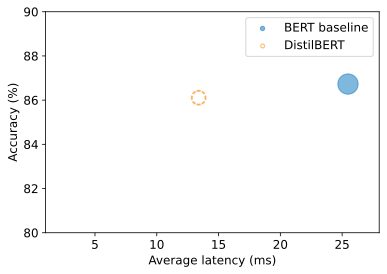

In [33]:
import pandas as pd

def plot_metrics(perf_metrics, current_optim_type):
    df = pd.DataFrame.from_dict(perf_metrics, orient="index")
    
    for idx in df.index:
        df_opt = df.loc[idx]
        # ÌòÑÏû¨ ÏµúÏ†ÅÌôî Î∞©Î≤ïÏùÑ Ï†êÏÑ†ÏúºÎ°ú Í∑∏Î¶∞Îã§.
        if idx == current_optim_type:
            plt.scatter(df_opt["time_avg_ms"], df_opt["accuracy"]*100,
                        alpha=0.5, s=df_opt["size_mb"], label=idx,
                        marker="$\u25CC$")
        else :
            plt.scatter(df_opt["time_avg_ms"], df_opt['accuracy']*100,
                        alpha=0.5, s=df_opt["size_mb"], label=idx)
    
    legend = plt.legend(bbox_to_anchor=(1,1))
    for handle in legend.legendHandles:
        handle.set_sizes([20])
    
    plt.ylim(80, 90)
    # Í∞ÄÏû• ÎäêÎ¶∞ Î™®Îç∏ÏùÑ ÏÇ¨Ïö©Ìï¥ X Ï∂ï Î≤îÏúÑÎ•º Ï†ïÌï©ÎãàÎã§.
    xlim = int(perf_metrics["BERT baseline"]["time_avg_ms"] + 3)
    plt.xlim(1, xlim)
    plt.ylabel("Accuracy (%)")
    plt.xlabel("Average latency (ms)")
    plt.show()

plot_metrics(perf_metrics, optim_type)

## 8.3.5 ÏòµÌà¨ÎÇòÎ°ú Ï¢ãÏùÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Ï∞æÍ∏∞
Ïù¥Ï†ú Ï¢ãÏùÄ Œ±ÏôÄ TÎ•º Ï∞æÏïÑÏïºÏßÄ

Ïù¥Îü∞ ÏûëÏóÖÏùÑ ÏúÑÌï¥ ÏÑ§Í≥ÑÎêú ÏµúÏ†ÅÌôî ÌîÑÎ†àÏûÑÏõåÌÅ¨ OptunaÎ•º ÏÇ¨Ïö©ÌïòÎäî Î∞©Î≤ïÏù¥ Í∑∏Î¶¨Îìú ÏÑúÏπòÎ≥¥Îã§ Îçî Ï¢ãÎã§.

ÏòµÌà¨ÎÇòÎäî Í≤ÄÏÉâ Î¨∏Ï†úÎ•º Ïó¨Îü¨ ÏãúÎèÑÎ•º ÌÜµÌï¥ ÏµúÏ†ÅÌôîÌï† Î™©Ï†Å Ìï®ÏàòÎ°ú ÌëúÌòÑÌïúÎã§.

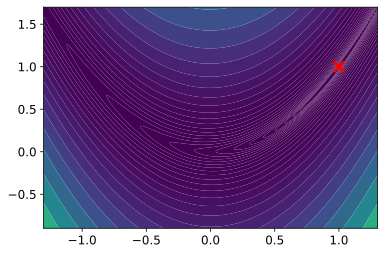

In [34]:
# Îëê Î≥ÄÏàòÎ•º Í∞ÄÏßÑ Î°úÏ††Î∏åÎ°ù Ìï®Ïàò Í∑∏ÎûòÌîÑ
import matplotlib.pyplot as plt
import numpy as np

def f(x, y):
    return (1-x)**2+100*(y-x**2)**2
    
X, Y = np.meshgrid(np.linspace(-2, 2, 250), np.linspace(-1, 3, 250))
Z = f(X,Y)
_, ax = plt.subplots()
ax.plot([1], [1], 'x', mew=3, markersize=10, color="red")
ax.contourf(X, Y, Z, np.logspace(-1, 3, 30), cmap='viridis', extend="both")
ax.set_xlim(-1.3, 1.3)
ax.set_ylim(-0.9, 1.7)
plt.show()

ÏòµÌà¨ÎÇòÏóêÏÑúÎäî f(x,y)Ïùò Í∞íÏùÑ Î∞òÌôòÌïòÎäî objective() Ìï®ÏàòÎ•º Ï†ïÏùòÌï¥ f(x,y)Ïùò ÏµúÏÜåÍ∞íÏùÑ Ï∞æÎäîÎã§.

In [35]:
def objective(trial):
    x = trial.suggest_float("x", -2, 2)
    y = trial.suggest_float("y", -2, 2)
    return (1 - x) ** 2 + 100 * (y - x ** 2) ** 2

trial.suggest_float() Î©îÏÑúÎìú: Í∑†Îì±ÌïòÍ≤å ÏÉòÌîåÎßÅÌï† ÌååÎùºÎØ∏ÌÑ∞ Î≤îÏúÑÎ•º ÏßÄÏ†ï.  
ÏòµÌà¨ÎÇòÎäî Ï†ïÏàòÏôÄ Î≤îÏ£ºÌòï ÌååÎùºÎØ∏ÌÑ∞Î•º ÏúÑÌï¥ Í∞ÅÍ∞Å suggest_intÏôÄ suggest_categoricalÎèÑ Ï†úÍ≥µ

ÏòµÌà¨ÎÇòÎäî Ïó¨Îü¨ ÏãúÎèÑÎ•º ÌïòÎÇòÏùò studyÎ°ú ÏàòÏßëÌïòÎØÄÎ°ú Îã§ÏùåÏ≤òÎüº objective() Ìï®ÏàòÎ•º study.optimize() Î©îÏÑúÎìúÏóê Ï†ÑÎã¨ÌïúÎã§.

In [36]:
import optuna

study = optuna.create_study()
study.optimize(objective, n_trials=1000)

[I 2023-08-03 15:39:50,671] A new study created in memory with name: no-name-8354a85f-2351-4691-b74d-b74e8eebb3bc
[I 2023-08-03 15:39:50,673] Trial 0 finished with value: 8.131464089545833 and parameters: {'x': 1.1636094643959236, 'y': 1.6386744639778645}. Best is trial 0 with value: 8.131464089545833.
[I 2023-08-03 15:39:50,673] Trial 1 finished with value: 802.5670731392961 and parameters: {'x': -1.4263374402980924, 'y': -0.7881134718512959}. Best is trial 0 with value: 8.131464089545833.
[I 2023-08-03 15:39:50,674] Trial 2 finished with value: 3.3803960016667585 and parameters: {'x': -0.7082292873915876, 'y': 0.433592495435251}. Best is trial 2 with value: 3.3803960016667585.
[I 2023-08-03 15:39:50,675] Trial 3 finished with value: 223.25642970477992 and parameters: {'x': 0.99506175234675, 'y': -0.5040288231923182}. Best is trial 2 with value: 3.3803960016667585.
[I 2023-08-03 15:39:50,676] Trial 4 finished with value: 367.5439998627095 and parameters: {'x': 0.11713595907543528, 'y'

[I 2023-08-03 15:39:50,955] Trial 42 finished with value: 2.0537325088996816 and parameters: {'x': 0.7896015083188768, 'y': 0.7652261408975812}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:50,964] Trial 43 finished with value: 3.5524530488436046 and parameters: {'x': 0.8248141352355016, 'y': 0.4926547500873353}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:50,972] Trial 44 finished with value: 9.636860212358899 and parameters: {'x': 0.9951254698563771, 'y': 0.6798421565332584}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:50,980] Trial 45 finished with value: 6.765935874364725 and parameters: {'x': 0.5810452642186666, 'y': 0.08089560586183298}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:50,988] Trial 46 finished with value: 32.412657760552264 and parameters: {'x': 1.3328304219208675, 'y': 1.208089489943823}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:50,996] Tria

[I 2023-08-03 15:39:51,316] Trial 85 finished with value: 93.44453902967031 and parameters: {'x': 1.0352509507908128, 'y': 0.10508380262505644}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,324] Trial 86 finished with value: 3.3386309347529237 and parameters: {'x': 0.5821047536520148, 'y': 0.5167221511163886}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,333] Trial 87 finished with value: 7.600402114750241 and parameters: {'x': 0.762912054981139, 'y': 0.30736788860796105}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,342] Trial 88 finished with value: 111.76399907335635 and parameters: {'x': 0.942613007099497, 'y': -0.16865007995414583}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,350] Trial 89 finished with value: 24.990371273399578 and parameters: {'x': 0.468155234458962, 'y': 0.7162358424274835}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,359] Tri

[I 2023-08-03 15:39:51,692] Trial 127 finished with value: 6.19898128873581 and parameters: {'x': 0.7953816828756067, 'y': 0.38449672301721183}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,701] Trial 128 finished with value: 2.127907147943112 and parameters: {'x': 0.22400148061156167, 'y': -0.0733439198208124}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,710] Trial 129 finished with value: 0.2599498967858537 and parameters: {'x': 0.6989600367083098, 'y': 0.5296942322112799}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,719] Trial 130 finished with value: 11.49692654121346 and parameters: {'x': 0.9052456749938567, 'y': 0.48053097421829366}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,728] Trial 131 finished with value: 5.313192793789845 and parameters: {'x': 0.6574684127013597, 'y': 0.6602091127427181}. Best is trial 41 with value: 0.1350233416185288.
[I 2023-08-03 15:39:51,737

[I 2023-08-03 15:39:52,069] Trial 169 finished with value: 31.993177077196044 and parameters: {'x': 0.9910319965104113, 'y': 0.41652001400068084}. Best is trial 154 with value: 0.1167634805355392.
[I 2023-08-03 15:39:52,078] Trial 170 finished with value: 1.0326263447254924 and parameters: {'x': 0.6487272884134692, 'y': 0.5162008480312653}. Best is trial 154 with value: 0.1167634805355392.
[I 2023-08-03 15:39:52,087] Trial 171 finished with value: 0.8780302315820273 and parameters: {'x': 0.7214384599374055, 'y': 0.6099404118577683}. Best is trial 154 with value: 0.1167634805355392.
[I 2023-08-03 15:39:52,097] Trial 172 finished with value: 6.062364546718178 and parameters: {'x': 0.857471368836375, 'y': 0.4894513279382223}. Best is trial 154 with value: 0.1167634805355392.
[I 2023-08-03 15:39:52,106] Trial 173 finished with value: 0.05702668752817275 and parameters: {'x': 0.7647297538397607, 'y': 0.5807194101952041}. Best is trial 173 with value: 0.05702668752817275.
[I 2023-08-03 15:39

[I 2023-08-03 15:39:52,463] Trial 211 finished with value: 0.15338224754133017 and parameters: {'x': 0.6216496723852181, 'y': 0.39656428133669386}. Best is trial 173 with value: 0.05702668752817275.
[I 2023-08-03 15:39:52,473] Trial 212 finished with value: 0.8684134700558431 and parameters: {'x': 0.6125145858514716, 'y': 0.29042339376129817}. Best is trial 173 with value: 0.05702668752817275.
[I 2023-08-03 15:39:52,482] Trial 213 finished with value: 3.245792624836757 and parameters: {'x': 0.446119657416587, 'y': 0.3704581357146071}. Best is trial 173 with value: 0.05702668752817275.
[I 2023-08-03 15:39:52,492] Trial 214 finished with value: 1.2792147843416102 and parameters: {'x': 0.634489143071733, 'y': 0.5096099533167359}. Best is trial 173 with value: 0.05702668752817275.
[I 2023-08-03 15:39:52,501] Trial 215 finished with value: 0.04949617816369656 and parameters: {'x': 0.780372189876511, 'y': 0.605431384106681}. Best is trial 215 with value: 0.04949617816369656.
[I 2023-08-03 15

[I 2023-08-03 15:39:52,877] Trial 253 finished with value: 0.024300779010505143 and parameters: {'x': 0.8441226187354778, 'y': 0.712369184626313}. Best is trial 226 with value: 0.005680741628251121.
[I 2023-08-03 15:39:52,887] Trial 254 finished with value: 4.448488368708159 and parameters: {'x': 0.8452676339396511, 'y': 0.9248234274676288}. Best is trial 226 with value: 0.005680741628251121.
[I 2023-08-03 15:39:52,897] Trial 255 finished with value: 4.938959639329438 and parameters: {'x': 0.9668849461712613, 'y': 0.7126534699795094}. Best is trial 226 with value: 0.005680741628251121.
[I 2023-08-03 15:39:52,908] Trial 256 finished with value: 1.1004179927798827 and parameters: {'x': 0.8597974493278607, 'y': 0.8432113209327299}. Best is trial 226 with value: 0.005680741628251121.
[I 2023-08-03 15:39:52,918] Trial 257 finished with value: 0.4562798958484332 and parameters: {'x': 0.8160201318660342, 'y': 0.7308835710858307}. Best is trial 226 with value: 0.005680741628251121.
[I 2023-08-

[I 2023-08-03 15:39:53,312] Trial 295 finished with value: 0.2584909949811976 and parameters: {'x': 0.7968046711202267, 'y': 0.6815026893693543}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,322] Trial 296 finished with value: 0.30356400184973653 and parameters: {'x': 0.9061102336781003, 'y': 0.7667449908339387}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,333] Trial 297 finished with value: 21.730362830702898 and parameters: {'x': 1.035291290021545, 'y': 0.6056830417538984}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,344] Trial 298 finished with value: 833.9464200319647 and parameters: {'x': -1.9222458818280983, 'y': 0.8220396739447349}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,354] Trial 299 finished with value: 322.5552440227441 and parameters: {'x': 0.781166189435001, 'y': -1.18562836417565}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03

[I 2023-08-03 15:39:53,772] Trial 337 finished with value: 12.048038565917599 and parameters: {'x': 0.9675339660465003, 'y': 0.5890343132909694}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,784] Trial 338 finished with value: 58.270681480804086 and parameters: {'x': 1.3124651845213755, 'y': 0.9598522870035903}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,795] Trial 339 finished with value: 4.252433426255697 and parameters: {'x': 0.7338126041579233, 'y': 0.7429700012139214}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,806] Trial 340 finished with value: 0.11219451039843235 and parameters: {'x': 0.8464463768176895, 'y': 0.6867030635621407}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:53,818] Trial 341 finished with value: 52.34749273240481 and parameters: {'x': -0.31695895927509465, 'y': 0.8118919089684349}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-0

[I 2023-08-03 15:39:54,253] Trial 379 finished with value: 30.36012479672831 and parameters: {'x': 1.1689059687672767, 'y': 0.8155998854463073}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:54,265] Trial 380 finished with value: 2.629896100621738 and parameters: {'x': 0.8982529084445309, 'y': 0.9687083301605558}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:54,277] Trial 381 finished with value: 198.04269214755433 and parameters: {'x': -1.4588324515787492, 'y': 0.7425628960387785}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:54,288] Trial 382 finished with value: 3.0769918207780527 and parameters: {'x': 0.6817855304681878, 'y': 0.6373345927792089}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:54,300] Trial 383 finished with value: 141.2760839401272 and parameters: {'x': 0.8447633521745691, 'y': -0.47486966435320155}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08

[I 2023-08-03 15:39:54,753] Trial 421 finished with value: 50.07519678537086 and parameters: {'x': 0.8252523502555962, 'y': 1.3884639465050754}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:54,765] Trial 422 finished with value: 35.80928813851443 and parameters: {'x': 0.44520791194268666, 'y': 0.7940413854569938}. Best is trial 270 with value: 0.005347701402861605.
[I 2023-08-03 15:39:54,778] Trial 423 finished with value: 0.0016475370836010962 and parameters: {'x': 0.9601378423636792, 'y': 0.9210995262085571}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:54,791] Trial 424 finished with value: 0.023125230210414422 and parameters: {'x': 1.1170856812349816, 'y': 1.2575841161755874}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:54,805] Trial 425 finished with value: 3.0608690049597005 and parameters: {'x': 1.1558996066251765, 'y': 1.1618464956570556}. Best is trial 423 with value: 0.0016475370836010962.
[I 

[I 2023-08-03 15:39:55,274] Trial 463 finished with value: 34.71537753987329 and parameters: {'x': 0.5972869247448784, 'y': 0.9445713683283844}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,286] Trial 464 finished with value: 629.0080441363452 and parameters: {'x': 1.271328378200145, 'y': -0.8915806599433789}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,299] Trial 465 finished with value: 223.95861375418616 and parameters: {'x': 0.9110891432828909, 'y': -0.6664148476778022}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,311] Trial 466 finished with value: 173.91946399743895 and parameters: {'x': -0.31895127948791335, 'y': -1.2104432083041838}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,324] Trial 467 finished with value: 54.18421901481841 and parameters: {'x': 0.514888401120591, 'y': 0.9996091176940272}. Best is trial 423 with value: 0.0016475370836010962.
[I 20

[I 2023-08-03 15:39:55,808] Trial 505 finished with value: 82.22281555233121 and parameters: {'x': -0.5796378228881014, 'y': 1.2288829114229185}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,822] Trial 506 finished with value: 38.84374213297534 and parameters: {'x': 0.40309665276100115, 'y': 0.7828694428703713}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,836] Trial 507 finished with value: 12.732200904389666 and parameters: {'x': -0.8140733676867528, 'y': 0.9699830629485449}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,850] Trial 508 finished with value: 5.8966050546801565 and parameters: {'x': 0.9577947043487394, 'y': 0.6745781140846696}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:55,864] Trial 509 finished with value: 38.473781833316515 and parameters: {'x': 1.0377447047006263, 'y': 1.6971749621682433}. Best is trial 423 with value: 0.0016475370836010962.
[I 2

[I 2023-08-03 15:39:56,369] Trial 547 finished with value: 54.808890735816696 and parameters: {'x': 1.3201207693644335, 'y': 1.003081005755667}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,382] Trial 548 finished with value: 35.280172508535415 and parameters: {'x': 0.7112868328746077, 'y': -0.08734009683098243}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,396] Trial 549 finished with value: 2.3055640955020147 and parameters: {'x': 0.8217609491120432, 'y': 0.8260821360094419}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,409] Trial 550 finished with value: 0.010149286856427062 and parameters: {'x': 0.9543323281940322, 'y': 0.9197300315035322}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,423] Trial 551 finished with value: 1.7925907629357316 and parameters: {'x': 1.0328232555022059, 'y': 0.9328764491580082}. Best is trial 423 with value: 0.0016475370836010962.
[I

[I 2023-08-03 15:39:56,947] Trial 589 finished with value: 0.9788769263817116 and parameters: {'x': 1.0304602300316474, 'y': 0.962956976616467}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,961] Trial 590 finished with value: 390.4017872672394 and parameters: {'x': 1.3088730508787016, 'y': -0.2624686698370444}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,975] Trial 591 finished with value: 178.73555785030342 and parameters: {'x': 0.8365463891583379, 'y': -0.63701039883387}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:56,989] Trial 592 finished with value: 53.72683536354896 and parameters: {'x': 0.6807997196684468, 'y': 1.195778819106831}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:57,002] Trial 593 finished with value: 30.779001918176228 and parameters: {'x': -1.113867680421571, 'y': 0.7277629544526307}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-0

[I 2023-08-03 15:39:57,537] Trial 631 finished with value: 45.38373664417305 and parameters: {'x': 0.8538258158480221, 'y': 0.055502601561259385}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:57,552] Trial 632 finished with value: 178.78611934562076 and parameters: {'x': 0.4669909986021551, 'y': 1.5541270768097684}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:57,566] Trial 633 finished with value: 57.097598725241795 and parameters: {'x': 1.1296396822246086, 'y': 0.5205674976625091}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:57,581] Trial 634 finished with value: 83.73316722639223 and parameters: {'x': -0.11850962316702701, 'y': 0.922241114399728}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:57,595] Trial 635 finished with value: 289.46039668393513 and parameters: {'x': -0.2862801502852259, 'y': 1.7784405715269127}. Best is trial 423 with value: 0.0016475370836010962.
[I 

[I 2023-08-03 15:39:58,156] Trial 673 finished with value: 1.325738652642676 and parameters: {'x': 0.6612707511182201, 'y': 0.3272335089392814}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,170] Trial 674 finished with value: 44.279078747394585 and parameters: {'x': 1.599891567377075, 'y': 1.8969373352701115}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,185] Trial 675 finished with value: 5.93625997338399 and parameters: {'x': 0.9988364691230345, 'y': 0.7540299073502582}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,200] Trial 676 finished with value: 530.6355893536614 and parameters: {'x': 0.7776238452792155, 'y': -1.6987467009509003}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,214] Trial 677 finished with value: 3.9230510856219003 and parameters: {'x': 0.8784406127615674, 'y': 0.9693514710201845}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-0

[I 2023-08-03 15:39:58,786] Trial 715 finished with value: 124.0171853983336 and parameters: {'x': 0.8721706279069095, 'y': -0.35287506276235703}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,801] Trial 716 finished with value: 82.2067454875445 and parameters: {'x': 0.15495427656833538, 'y': 0.9267435856951365}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,817] Trial 717 finished with value: 8.964721287795683 and parameters: {'x': 1.1453431623986376, 'y': 1.012752492912448}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,832] Trial 718 finished with value: 1380.2329412906995 and parameters: {'x': -1.3133147569792931, 'y': -1.9831438255830682}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:58,848] Trial 719 finished with value: 3.2923517396016204 and parameters: {'x': 1.0031276059183234, 'y': 0.8248168756146528}. Best is trial 423 with value: 0.0016475370836010962.
[I 20

[I 2023-08-03 15:39:59,451] Trial 757 finished with value: 3.6110588852905483 and parameters: {'x': 0.8667016675089902, 'y': 0.9407315451769424}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:59,467] Trial 758 finished with value: 637.7008333591607 and parameters: {'x': -0.7819498546618688, 'y': -1.907533360940099}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:59,483] Trial 759 finished with value: 104.31552734957424 and parameters: {'x': 0.3539596330253928, 'y': 1.1445918866001499}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:59,499] Trial 760 finished with value: 436.74263570604666 and parameters: {'x': -1.6810455254725793, 'y': 0.7533440825793558}. Best is trial 423 with value: 0.0016475370836010962.
[I 2023-08-03 15:39:59,515] Trial 761 finished with value: 501.83185712745 and parameters: {'x': 1.1895624887250236, 'y': -0.8250212696758434}. Best is trial 423 with value: 0.0016475370836010962.
[I 202

[I 2023-08-03 15:40:00,137] Trial 799 finished with value: 2.606871375436465 and parameters: {'x': 1.156690514066239, 'y': 1.1772369759277848}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,154] Trial 800 finished with value: 24.9120169634064 and parameters: {'x': 0.68226496716555, 'y': 0.9635925162121427}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,170] Trial 801 finished with value: 425.9722406919068 and parameters: {'x': 0.8422754948819294, 'y': -1.3544212189170848}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,187] Trial 802 finished with value: 0.8070033296248147 and parameters: {'x': 0.4902282380480201, 'y': 0.3142923728149945}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,203] Trial 803 finished with value: 129.29057324547875 and parameters: {'x': -1.4114151816859217, 'y': 0.880896837477433}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-

[I 2023-08-03 15:40:00,839] Trial 841 finished with value: 0.07198086324651551 and parameters: {'x': 0.8633987277153059, 'y': 0.7685486937868933}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,856] Trial 842 finished with value: 16.068785745007467 and parameters: {'x': 1.1755436235941878, 'y': 0.9814284649628392}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,873] Trial 843 finished with value: 11.300321815339949 and parameters: {'x': 0.9300452047063735, 'y': 1.2010707999099632}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,891] Trial 844 finished with value: 36.54438852728129 and parameters: {'x': -0.8742904286163208, 'y': 0.18965404391105173}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:00,908] Trial 845 finished with value: 37.60243360633374 and parameters: {'x': 0.6863834939177589, 'y': 1.0835280346397873}. Best is trial 768 with value: 0.0007282446571885969.
[I 2

[I 2023-08-03 15:40:01,570] Trial 883 finished with value: 3.943584433768166 and parameters: {'x': -0.9395986933053639, 'y': 0.9254533731014627}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:01,588] Trial 884 finished with value: 208.31123693678973 and parameters: {'x': 1.518208887617572, 'y': 0.8625897004200382}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:01,605] Trial 885 finished with value: 25.009299157480775 and parameters: {'x': -1.2582205271868951, 'y': 1.1369155870226102}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:01,623] Trial 886 finished with value: 4.738659070600579 and parameters: {'x': 0.9449791032450154, 'y': 0.6753704378120071}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:01,640] Trial 887 finished with value: 76.00874708285649 and parameters: {'x': 0.35823679685158855, 'y': 0.9977983061800579}. Best is trial 768 with value: 0.0007282446571885969.
[I 202

[I 2023-08-03 15:40:02,473] Trial 925 finished with value: 22.373936647003948 and parameters: {'x': -1.0828663531777565, 'y': 0.747916075523823}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:02,492] Trial 926 finished with value: 281.6502961724731 and parameters: {'x': 1.2747630722017624, 'y': -0.052998184215098026}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:02,510] Trial 927 finished with value: 733.1057527020937 and parameters: {'x': -1.9602838531949187, 'y': 1.1513516569487183}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:02,528] Trial 928 finished with value: 0.04582416459562303 and parameters: {'x': 0.9230368192535052, 'y': 0.8320217767310994}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:02,546] Trial 929 finished with value: 156.79772995561174 and parameters: {'x': 0.11269147642000366, 'y': -1.2363419176480304}. Best is trial 768 with value: 0.0007282446571885969.


[I 2023-08-03 15:40:03,253] Trial 967 finished with value: 204.83324567150052 and parameters: {'x': 1.1043313267174866, 'y': -0.21161394917908066}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:03,271] Trial 968 finished with value: 293.4037458601659 and parameters: {'x': -1.6711453089108432, 'y': 1.100778864753159}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:03,290] Trial 969 finished with value: 41.249867825259116 and parameters: {'x': 1.2565711529467005, 'y': 0.937223144082768}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:03,309] Trial 970 finished with value: 0.04065943844299949 and parameters: {'x': 0.9967640057660464, 'y': 1.0137000721123648}. Best is trial 768 with value: 0.0007282446571885969.
[I 2023-08-03 15:40:03,328] Trial 971 finished with value: 0.027848176506357944 and parameters: {'x': 0.9870906245957134, 'y': 0.9577101355296022}. Best is trial 768 with value: 0.0007282446571885969.
[I

In [37]:
# ÏµúÏÉÅÏùò ÌååÎùºÎØ∏ÌÑ∞ ÌöçÎìù
study.best_params

{'x': 1.0099379426087436, 'y': 1.0174657000259584}

1000Î≤àÏùò ÏãúÎèÑÎ•º ÌÜµÌï¥ ÏòµÌà¨ÎÇòÎäî Ï†ÑÏó≠ ÏµúÏÜüÍ∞íÏóê ÏÉÅÎãπÌûà Í∞ÄÍπåÏö¥ xÏôÄ yÍ∞íÏùÑ Ï∞æÏùå.  
### Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§ÏóêÏÑú ÏòµÌà¨ÎÇòÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ ÎπÑÏä∑Ìïú Î°úÏßÅÏùÑ ÏÇ¨Ïö©ÌïúÎã§.

### Î®ºÏ†Ä ÏµúÏ†ÅÌôîÌïòÎ†§Îäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≥µÍ∞ÑÏùÑ Ï†ïÏùòÌïúÎã§.  
Îã§ÏùåÏ≤òÎüº Œ±ÏôÄ T Ïô∏Ïóê ÌõàÎ†® ÏóêÌè¨ÌÅ¨ ÌöüÏàòÎ•º Ìè¨Ìï®ÏãúÌÇ§Í≤†Îã§.

In [38]:
def hp_space(trial):
    return {"num_train_epochs": trial.suggest_int("num_train_epochs", 5, 10),
        "alpha": trial.suggest_float("alpha", 0, 1),
        "temperature": trial.suggest_int("temperature", 2, 20)}

### TrainerÎ°ú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≤ÄÏÉâÏùÑ Ïã§ÌñâÌïòÎäî Î≤ïÏùÄ 
Ìä∏Î†àÏù¥ÎÑàÏùò hyperparameter_search() Î©îÏÑúÎìúÏóê ÏãúÎèÑ ÌöüÏàòÏôÄ ÏµúÏ†ÅÌôî Î∞©Ìñ•ÏùÑ ÏßÄÏ†ïÌïòÍ≥† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Í≤ÄÏÉâ Í≥µÍ∞ÑÏùÑ Ï†ÑÎã¨ÌïòÎ©¥ ÎêúÎã§.
https://huggingface.co/docs/transformers/hpo_train

hyperparameter_search() Î©îÏÑúÎìúÎäî ÏµúÎåÄÌôîÎêú Î™©Ï†Å Ìï®ÏàòÏùò Í∞íÍ≥º Ìï¥Îãπ ÏãúÎèÑÏóê ÏÇ¨Ïö©Ìïú ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Îã¥ÏùÄ BestRun Í∞ùÏ≤¥Î•º Î∞òÌôòÌïúÎã§.

In [39]:
best_run = distilbert_trainer.hyperparameter_search(
    n_trials=20, direction="maximize", hp_space=hp_space)

[I 2023-08-03 15:40:03,882] A new study created in memory with name: no-name-63dde8c0-6cd3-47d9-8fe4-a2d5a0953deb
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 15:42:53,383] Trial 0 finished with value: 0.0064516129032258064 and parameters: {'num_train_epochs': 5, 'alpha': 0.7119080837389683, 'temperature': 5}. Best is trial 0 with value: 0.0064516129032258064.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 15:46:05,523] Trial 1 finished with value: 0.0064516129032258064 and parameters: {'num_train_epochs': 5, 'alpha': 0.3963802099627812, 'temperature': 3}. Best is trial 0 with value: 0.0064516129032258064.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 15:53:02,139] Trial 2 finished with value: 0.0064516129032258064 and parameters: {'num_train_epochs': 10, 'alpha': 0.8464935355851676, 'temperature': 17}. Best is trial 0 with value: 0.0064516129032258064.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 15:56:06,188] Trial 3 finished with value: 0.0064516129032258064 and parameters: {'num_train_epochs': 5, 'alpha': 0.006916760475260353, 'temperature': 19}. Best is trial 0 with value: 0.0064516129032258064.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:00:33,460] Trial 4 finished with value: 0.0064516129032258064 and parameters: {'num_train_epochs': 7, 'alpha': 0.6155862960652855, 'temperature': 17}. Best is trial 0 with value: 0.0064516129032258064.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:01:12,158] Trial 5 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:01:51,794] Trial 6 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:08:05,141] Trial 7 finished with value: 0.92 and parameters: {'num_train_epochs': 8, 'alpha': 0.021102337101901125, 'temperature': 4}. Best is trial 7 with value: 0.92.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:08:45,482] Trial 8 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:14:31,378] Trial 9 finished with value: 0.9167741935483871 and parameters: {'num_train_epochs': 8, 'alpha': 0.8037140367246797, 'temperature': 8}. Best is trial 7 with value: 0.92.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:15:15,598] Trial 10 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:15:51,591] Trial 11 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:20:37,131] Trial 12 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:21:13,789] Trial 13 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:26:39,211] Trial 14 finished with value: 0.9274193548387096 and parameters: {'num_train_epochs': 9, 'alpha': 0.5491291899999895, 'temperature': 2}. Best is trial 14 with value: 0.9274193548387096.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:30:12,469] Trial 15 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:33:48,264] Trial 16 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:39:14,161] Trial 17 finished with value: 0.9258064516129032 and parameters: {'num_train_epochs': 9, 'alpha': 0.3948243563810905, 'temperature': 2}. Best is trial 14 with value: 0.9274193548387096.
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:39:51,200] Trial 18 pruned. 
/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


[I 2023-08-03 16:43:26,670] Trial 19 pruned. 


In [40]:
import pandas as pd
df_temp = pd.DataFrame.from_dict(clinc_enc["validation"])
df_temp.isnull().value_counts()

labels  input_ids  attention_mask
False   False      False             3100
Name: count, dtype: int64

In [41]:
print(best_run)

BestRun(run_id='14', objective=0.9274193548387096,
hyperparameters={'num_train_epochs': 9, 'alpha': 0.5491291899999895,
'temperature': 2}, run_summary=None)


  Œ±Í∞íÏùÑ Î≥¥Îãà 48% Ï†ïÎèÑÏùò ÏÜêÏã§ÏùÄ ÏùºÎ∞òÏ†ÅÏù∏ ÌÅ¨Î°úÏä§ ÏóîÌä∏Î°úÌîºÏóêÏÑú, ÎÇòÎ®∏ÏßÄ 52% Ï†ïÎèÑÏùò ÏÜêÏã§ÏùÄ ÏßÄÏãù Ï†ïÏ†ú Ìï≠ÏóêÏÑú ÏñªÏùÑ Îïå Ìö®Í≥ºÍ∞Ä Í∞ÄÏû• Ï¢ãÎã§Í≥† ÌïúÎã§.

### Ïù¥Ï†ú ÌõàÎ†® Îß§Í∞úÎ≥ÄÏàòÎ•º best_runÏùò Í∞íÏúºÎ°ú Î∞îÍæ∏Í≥† ÏµúÏ¢Ö ÌõàÎ†®ÏùÑ Ïã§ÌñâÌï¥Î≥¥Ïûê

In [42]:
for k,v in best_run.hyperparameters.items():
    setattr(student_training_args, k, v) # objectÏóê Ï°¥Ïû¨ÌïòÎäî ÏÜçÏÑ±Ïùò Í∞íÏùÑ Î∞îÍæ∏Í±∞ÎÇò, ÏÉàÎ°úÏö¥ ÏÜçÏÑ±ÏùÑ ÏÉùÏÑ±ÌïòÏó¨ Í∞íÏùÑ Î∂ÄÏó¨
    
# Ï†ïÏ†úÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÏÉàÎ°úÏö¥ Ï†ÄÏû•ÏÜåÎ•º Ï†ïÏùòÌï©ÎãàÎã§
distilled_ckpt = "distilbert-base-uncased-distilled-clinc"
student_training_args.output_dir = distilled_ckpt

# ÏµúÏ†ÅÏùò Îß§Í∞úÎ≥ÄÏàòÎ°ú ÏÉàÎ°úÏö¥ TrainerÎ•º ÎßåÎì≠ÎãàÎã§
distil_trainer = DistillationTrainer(model_init=student_init,
    teacher_model=teacher_model, args=student_training_args,
    train_dataset=clinc_enc['train'], eval_dataset=clinc_enc['validation'],
    compute_metrics=compute_metrics, tokenizer=student_tokenizer)

Cloning https://huggingface.co/bh8648/distilbert-base-uncased-distilled-clinc into local empty directory.


Download file pytorch_model.bin:   0%|          | 9.12k/256M [00:00<?, ?B/s]

Download file training_args.bin: 100%|##########| 4.00k/4.00k [00:00<?, ?B/s]

Clean file training_args.bin:  25%|##5       | 1.00k/4.00k [00:00<?, ?B/s]

Clean file pytorch_model.bin:   0%|          | 1.00k/256M [00:00<?, ?B/s]

In [43]:
distil_trainer.train()

/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TrainOutput(global_step=2862, training_loss=0.7685739490887571, metrics={'train_runtime': 321.2085, 'train_samples_per_second': 427.293, 'train_steps_per_second': 8.91, 'total_flos': 743498049913920.0, 'train_loss': 0.7685739490887571, 'epoch': 9.0})

In [44]:
distil_trainer.push_to_hub("Training complete")

Upload file pytorch_model.bin:   0%|          | 1.00/256M [00:00<?, ?B/s]

Upload file training_args.bin:   0%|          | 1.00/4.00k [00:00<?, ?B/s]

To https://huggingface.co/bh8648/distilbert-base-uncased-distilled-clinc
   9b12f43..2974f83  main -> main

To https://huggingface.co/bh8648/distilbert-base-uncased-distilled-clinc
   2974f83..21d4b46  main -> main



'https://huggingface.co/bh8648/distilbert-base-uncased-distilled-clinc/commit/2974f837579c5fd43952aa485dd1c94c5f0b92b2'

## 8.3.6 Ï†ïÏ†ú Î™®Îç∏ Î≤§ÏπòÎßàÌÅ¨ ÏàòÌñâÌïòÍ∏∞
Ï†ïÌôïÎèÑ ÎÜíÏùÄ Ïä§ÌäúÎçòÌä∏ Î™®Îç∏ÏùÑ ÎßåÎì¶ -> Ïù¥Ï†ú ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ ÎßåÎì§Í≥† Î≤§ÏπòÎßàÌÅ¨Î•º Îã§Ïãú ÏàòÌñâÌï¥ ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ÏóêÏÑú ÏÑ±Îä•ÏùÑ ÌôïÏù∏

In [45]:
distilled_ckpt = "bh8648/distilbert-base-uncased-distilled-clinc"
pipe = pipeline("text-classification", model=distilled_ckpt)
optim_type = "Distillation"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - 255.88
ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - 13.67 +\- 4.04
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - 0.879


/tmp/ipykernel_1484/1299828502.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


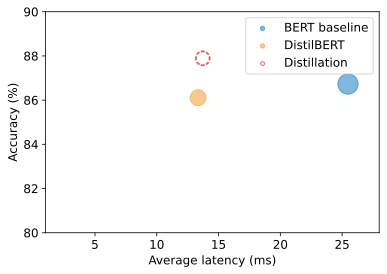

In [46]:
plot_metrics(perf_metrics, optim_type)

# 8.4 ÏñëÏûêÌôîÎ°ú Î™®Îç∏ ÏÜçÎèÑ ÎÜíÏù¥Í∏∞

Ïã†Í≤ΩÎßùÏùÑ ÏÇ¨Ïö©Ìï† Îïå ÌõàÎ†®ÏóêÎäî ÏñëÎ∞©Ìñ• Ìå®Ïä§Í∞Ä ÌïÑÏöîÌïòÏßÄÎßå ÌõàÎ†®Îêú Î™®Îç∏ÏùÑ Í∞ÄÏßÄÍ≥† Ï∂îÎ°†ÏùÑ ÏàòÌñâÌï† ÎïåÎäî Ï†ïÎ∞©Ìñ• Ìå®Ïä§Îßå ÌïÑÏöîÌïòÎã§.  
Îî∞ÎùºÏÑú Ï†ïÌôïÎèÑÏóê ÏßÄÎåÄÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÏßÄ ÏïäÍ≥† Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùò Ï†ïÎ∞ÄÎèÑÎ•º ÎÇÆÏ∂îÎäî Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©. -> Í≥†Ï†ï ÏÜåÏàòÏ†ê Ìè¨Îß∑

Í≥†Ï†ï ÏÜåÏàòÏ†ê Ìè¨Îß∑ÏùÄ ÎèôÏùº ÌÉÄÏûÖÏùò Î™®Îì† Î≥ÄÏàòÏóê ÎåÄÌï¥ Í≥µÌÜµ ÎπÑÏú®Î°ú Ïä§ÏºÄÏùºÏù¥ Ï°∞Ï†ïÎêòÎäî BÎπÑÌä∏ Ï†ïÏàòÎ°ú Ïã§ÏàòÎ•º ÌëúÌòÑÌïúÎã§.  
ÏòàÎ•º Îì§Î©¥ 137.035Îäî 1/1,000Î°ú Ïä§ÏºÄÏùºÏù¥ Ï°∞Ï†ïÎêòÎäî Ï†ïÏàò 137,035Î°ú ÌëúÌòÑÌïúÎã§.

Ïù¥ Ïä§ÏºÄÏùºÎßÅ Ïù∏ÏûêÎ•º Ï°∞Ï†ïÌï¥ÏÑú Í≥†Ï†ï ÏÜåÏàòÏ†ê Ïà´ÏûêÏùò Î≤îÏúÑÏôÄ Ï†ïÎ∞ÄÎèÑÎ•º Ï†úÏñ¥ÌïúÎã§.

ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏù¥ ÏñëÏûêÌôîÏùò Ï£ºÏöî ÌõÑÎ≥¥Ïù∏ Ïù¥Ïú†Îäî  
Í∞ÄÏ§ëÏπòÏôÄ ÌôúÏÑ±ÌôîÏùò Í∞í Î≤îÏúÑÍ∞Ä ÎπÑÍµêÏ†Å Ï¢ÅÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§.  
FP32 Ïà´ÏûêÏùò Ï†ÑÏ≤¥ Î≤îÏúÑÎ•º INT8Î°ú ÌëúÌòÑÌïòÎäî 2^8 = 256Í∞ú Ïà´ÏûêÎ°ú ÏïïÏ∂ïÌï† ÌïÑÏöîÍ∞Ä ÏóÜÎã§Îäî ÏùòÎØ∏Îã§.  
Ï†ïÏ†ú Î™®Îç∏Ïùò Ïñ¥ÌÖêÏÖò Í∞ÄÏ§ëÏπò ÌñâÎ†¨ Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌï¥ Í∞íÏùò ÎπàÎèÑ Î∂ÑÌè¨Î•º Í∑∏Î†§ ÌôïÏù∏Ìï¥Î≥¥Ïûê

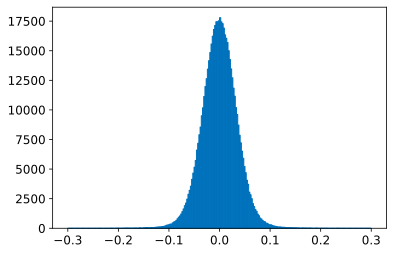

In [47]:
import matplotlib.pyplot as plt

state_dict = pipe.model.state_dict()
weights = state_dict["distilbert.transformer.layer.0.attention.out_lin.weight"]
plt.hist(weights.flatten().numpy(), bins=250, range=(-0.3,0.3), edgecolor="C0")
plt.show()

Í∞ÄÏ§ëÏπò Í∞íÏù¥ ÏõêÏ†êÏóê Í∞ÄÍπùÍ≥† Î≤îÏúÑÍ∞Ä Ï¢ÅÏùÄ [-0.1, 0.1] ÏÇ¨Ïù¥Ïóê Î∂ÑÌè¨Îê®.  
Ïù¥ ÌÖêÏÑúÎ•º Î∂ÄÌò∏Í∞Ä ÏûàÎäî 8ÎπÑÌä∏ Ï†ïÏàòÎ°ú ÏïïÏ∂ïÌïúÎã§Í≥† Ìï¥Î≥¥Ïûê.  
Ïù¥ Í≤ΩÏö∞ Í∞ÄÎä•Ìïú Ï†ïÏàò Î≤îÏúÑÎäî [q_max, q_min] = [-128, 127] Ïù¥Îã§.  
ÏõêÏ†êÏùÄ FP32Ïùò ÏõêÏ†êÍ≥º ÏùºÏπòÌïòÍ≥† Ïä§ÏºÄÏùºÎßÅ Ïù∏ÏûêÎäî Ï±Ö P.303Ïóê Ï†ÅÌûå Í≥µÏãùÏúºÎ°ú Í≥ÑÏÇ∞ÎêúÎã§.

In [48]:
zero_point = 0
scale = (weights.max() - weights.min()) / (127 - (-128))

### ÏñëÏûêÌôîÎêú ÌÖêÏÑúÎ•º ÏñªÏúºÎ†§Î©¥  
Îß§ÌïëÏùÑ Îí§ÏßëÏñ¥ q = f/S + ZÎ•º Í≥ÑÏÇ∞ÌïòÍ≥†, Î≤îÏúÑ Î∞ñÏùò Í∞íÏùÑ ÌÅ¥Î¶¨ÌïëÌïòÍ≥†, Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ï†ïÏàòÎ°ú Î∞òÏò¨Î¶ºÌïòÍ≥†, Tensor.char() Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï¥ torch.int8 Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏúºÎ°ú Í≤∞Í≥ºÎ•º ÌëúÌòÑÌïòÎ©¥ ÎêúÎã§.

In [49]:
weights

tensor([[-0.0289, -0.0395,  0.0007,  ..., -0.0343, -0.0184,  0.0427],
        [ 0.0460,  0.0133,  0.0069,  ..., -0.0222,  0.0365,  0.0019],
        [-0.0475, -0.0293,  0.0286,  ...,  0.0024,  0.0293, -0.0188],
        ...,
        [ 0.0297,  0.0008,  0.0658,  ...,  0.0003,  0.0336, -0.0040],
        [ 0.0013, -0.0120, -0.0650,  ...,  0.0612, -0.0388, -0.0712],
        [-0.0681, -0.0045, -0.0513,  ...,  0.0428,  0.0110, -0.0072]])

In [50]:
(weights / scale + zero_point).clamp(-128, 127).round().char()

tensor([[ -5,  -7,   0,  ...,  -6,  -3,   8],
        [  9,   3,   1,  ...,  -4,   7,   0],
        [ -9,  -6,   5,  ...,   0,   6,  -4],
        ...,
        [  6,   0,  12,  ...,   0,   6,  -1],
        [  0,  -2, -12,  ...,  12,  -7, -13],
        [-13,  -1, -10,  ...,   8,   2,  -1]], dtype=torch.int8)

### ÌååÏù¥ÌÜ†ÏπòÏóêÏÑúÎäî quantize_per_tensor() Ìï®ÏàòÏôÄ  
### Ï†ïÏàò ÏÇ∞Ïà† Ïó∞ÏÇ∞Ïóê ÏµúÏ†ÅÌôîÎêú ÏñëÏûêÌôî Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖ torch.qintÎ•º ÏÇ¨Ïö©Ìï¥ Í∞ÑÎã®Ìûà Î≥ÄÌôò Í∞ÄÎä•

In [51]:
from torch import quantize_per_tensor

dtype = torch.qint8
quantized_weights = quantize_per_tensor(weights, scale, zero_point, dtype)
quantized_weights.int_repr()

tensor([[ -5,  -7,   0,  ...,  -6,  -3,   8],
        [  9,   3,   1,  ...,  -4,   7,   0],
        [ -9,  -6,   5,  ...,   0,   6,  -4],
        ...,
        [  6,   0,  12,  ...,   0,   6,  -1],
        [  0,  -2, -12,  ...,  12,  -7, -13],
        [-13,  -1, -10,  ...,   8,   2,  -1]], dtype=torch.int8)

### FP32ÏôÄ INT8 Í∞íÏùò Í∞ÄÏ§ëÏπò ÌÖêÏÑúÎ•º ÏÇ¨Ïö©Ìï¥ Í≥±ÏÖàÌï† Îïå Í±∏Î¶¨Îäî ÏãúÍ∞ÑÏùÑ ÎπÑÍµê
FP32 ÌÖêÏÑúÏùò Í≤ΩÏö∞ ÌååÏù¥ÌÜ†ÏπòÏùò @ Ïó∞ÏÇ∞ÏûêÎ•º ÏÇ¨Ïö©Ìï¥ Í≥±ÏÖàÏùÑ ÏàòÌñâÌïúÎã§.

In [52]:
%%timeit
weights @ weights

2.46 ms ¬± 190 ¬µs per loop (mean ¬± std. dev. of 7 runs, 100 loops each)


ÏñëÏûêÌôîÎêú ÌÖêÏÑúÏùò Í≤ΩÏö∞ torch.qint8 Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏúºÎ°ú Ïó∞ÏÇ∞ÏùÑ ÏàòÌñâÌïòÎäî QFunctional wraper ÌÅ¥ÎûòÏä§Í∞Ä ÌïÑÏöî

In [53]:
from torch.nn.quantized import QFunctional

q_fn = QFunctional()

In [54]:
%%timeit
q_fn.mul(quantized_weights, quantized_weights)

164 ¬µs ¬± 87.9 ns per loop (mean ¬± std. dev. of 7 runs, 10,000 loops each)


FP32 Í≥ÑÏÇ∞Í≥º ÎπÑÍµêÌïòÎ©¥ INT8 ÌÖêÏÑúÍ∞Ä Ìõ®Ïî¨ Îπ†Î•¥Îã§.  
ÏñëÏûêÌôî Ïó∞ÏÇ∞ÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú Ïã§ÌñâÌïòÎäî Ï†ÑÏö© Î∞±ÏóîÎìúÎ•º ÏÇ¨Ïö©ÌïòÎ©¥ Ï∞®Ïù¥Í∞Ä Îçî Ïª§ÏßÑÎã§.

FP32 Ïà´ÏûêÏôÄ ÎπÑÍµêÌïòÎ©¥ INT8 Ïà´ÏûêÎäî ÏÇ¨Ïö©ÌïòÎäî ÎπÑÌä∏ ÏàòÍ∞Ä 1/4 Ïù¥ÎØÄÎ°ú ÏñëÏûêÌôîÎäî Î©îÎ™®Î¶¨ Ï†ÄÏû•ÎüâÎèÑ 1/4ÍπåÏßÄ Ï§ÑÏùº Ïàò ÏûàÎã§.

### Ïù¥ ÏòàÏ†úÏùò Í∞ÄÏ§ëÏπò ÌÖêÏÑúÏôÄ ÏñëÏûêÌôîÎêú ÌÖêÏÑúÏùò Ï†ÄÏû• ÌÅ¨Í∏∞Î•º ÎπÑÍµêÌï¥ÏÑú ÌôïÏù∏Ìï¥Î≥¥Ïûê.
ÌååÏù¥Ïç¨ sys Î™®ÎìàÏùò getsizeof() Ìï®ÏàòÏôÄ Tensor.storage() Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïúÎã§.

In [55]:
import sys
sys.getsizeof(weights.storage()) / sys.getsizeof(quantized_weights.storage())

/tmp/ipykernel_1484/2122423139.py:2: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  sys.getsizeof(weights.storage()) / sys.getsizeof(quantized_weights.storage())


3.999755879241598

### ÏôÑÏ†ÑÌïú Í∑úÎ™®Ïùò Ìä∏ÎûúÏä§Ìè¨Î®∏ÏóêÏÑú Ïã§Ï†ú ÏïïÏ∂ï ÎπÑÏú®ÏùÄ Ïñ¥Îñ§ Ï∏µÏùÑ ÏñëÏûêÌôîÌñàÎäîÏßÄÏóê Îî∞Îùº Îã§Î•¥Îã§. (Î≥¥ÌÜµ ÏÑ†Ìòï Ï∏µÎßå ÏñëÏûêÌôîÌïúÎã§.)

### ÏñëÏûêÌôîÏóêÏÑú Ï£ºÏùòÌï† Ï†ê
-> Î™®Îç∏Ïóê ÏûàÎäî Î™®Îì† Ïó∞ÏÇ∞ÏóêÏÑú Ï†ïÎ∞ÄÎèÑÎ•º Î∞îÍæ∏Î©¥ Î™®Îç∏Ïùò Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑ Í∞Å ÏßÄÏ†êÏóêÏÑú ÏûëÏùÄ Î≥ÄÎèôÏù¥ ÏÉùÍ∏∞Í≥†, Ïù¥Îäî Î™®Îç∏ ÏÑ±Îä•Ïóê ÎÇòÏÅú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπúÎã§.

### Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏóêÏÑú ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÎäî ÏñëÏûêÌôî Î∞©Î≤ïÏùÄ ÏÑ∏ Í∞ÄÏßÄÎã§.
1. ÎèôÏ†Å ÏñëÏûêÌôî
2. Ï†ïÏ†Å ÏñëÏûêÌôî
3. ÏñëÏûêÌôîÎ•º Í≥†Î†§Ìïú ÌõàÎ†®

### 1. ÎèôÏ†Å ÏñëÏûêÌôî
ÌõàÎ†® ÎèÑÏ§ëÏóê ÏïÑÎ¨¥Í≤ÉÎèÑ Î∞îÎÄåÏßÄ ÏïäÍ≥† Ï∂îÎ°† Í≥ºÏ†ïÏóêÎßå Ï†ÅÏùëÎê®.  
Î™®Îç∏ Í∞ÄÏ§ëÏπòÍ∞Ä Ï∂îÎ°† Ï†ÑÏóê INT8Î°ú Î≥ÄÌôòÎêúÎã§.  
'Í∞ÄÏ§ëÏπò' Ïô∏Ïóê Î™®Îç∏Ïùò 'ÌôúÏÑ±Ìôî'ÎèÑ ÏñëÏûêÌôîÎêòÎäîÎç∞(ÌôúÏÑ±Ìï®ÏàòÏùò Ï∂úÎ†•Í∞íÏùÑ ÏñëÏûêÌôî), Ïù¥ ÏñëÏûêÌôîÍ∞Ä Ï¶âÏÑùÏóêÏÑú ÏùºÏñ¥ÎÇòÍ∏∞ ÎïåÎ¨∏Ïóê ÎèôÏ†ÅÏù∏ Î∞©ÏãùÏù¥Îã§. -> Î™®Îì† ÌñâÎ†¨ Í≥±ÏÖàÏù¥ Í≥†ÎèÑÎ°ú ÏµúÏ†ÅÌôîÎêú INT8 Ìï®ÏàòÎ°ú Í≥ÑÏÇ∞ÎêúÎã§Îäî Îúª.  
  
ÎèôÏ†Å ÏñëÏûêÌôîÏóêÏÑúÎäî Î∂ÄÎèô ÏÜåÏàòÏ†ê Ìè¨Îß∑ÏúºÎ°ú ÌôúÏÑ±ÌôîÎ•º Î©îÎ™®Î¶¨Ïóê Ïì∞Í≥† ÏùΩÎäîÎã§.  
Îî∞ÎùºÏÑú Ï†ïÏàòÏôÄ Î∂ÄÎèô ÏÜåÏàòÏ†ê Í∞ÑÏùò Î≥ÄÌôòÏù¥ ÏÑ±Îä• Î≥ëÎ™©Ïù¥ ÎêòÎäî Í≤ΩÏö∞ÎèÑ ÏûàÎã§.

### 2. Ï†ïÏ†Å ÏñëÏûêÌôî
Ï¶âÏÑùÏóêÏÑú ÌôúÏÑ±ÌôîÎ•º ÏñëÏûêÌôîÌïòÏßÄ ÏïäÍ≥† ÏñëÏûêÌôî Ï≤¥Í≥Ñ(scheme)Î•º ÏÇ¨Ï†ÑÏóê Í≥ÑÏÇ∞Ìï¥ Î∂ÄÎèô ÏÜåÏàòÏ†ê Î≥ÄÌôòÏùÑ ÌîºÌïòÎäî Î∞©Î≤ï.  
Ï†ïÏ†Å ÏñëÏûêÌôîÎäî Ï∂îÎ°†Ïóê ÏïûÏÑú ÎåÄÌëú ÏÉòÌîå Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌôúÏÑ±Ìôî Ìå®ÌÑ¥ÏùÑ Í¥ÄÏ∞∞ ÌõÑ Ïù¥ÏÉÅÏ†ÅÏù∏ ÏñëÏûêÌôî Ï≤¥Í≥ÑÎ•º Í≥ÑÏÇ∞Ìï¥ Ï†ÄÏû•ÌïúÎã§. -> INT8Í≥º FP32 Í∞ÑÏùò Ï†ÑÌôòÏùÑ ÌîºÌïòÍ≥† Í≥ÑÏÇ∞ ÏÜçÎèÑÎ•º ÎÜíÏùº Ïàò ÏûàÎã§.  
  
ÌïòÏßÄÎßå Ï¢ãÏùÄ Îç∞Ïù¥ÌÑ∞ ÏÉòÌîåÏùÑ Ï∞æÏïÑÏïº ÌïòÍ≥† ÌååÏù¥ÌîÑÎùºÏù∏Ïóê Ï∂îÍ∞Ä Îã®Í≥ÑÎ•º ÎèÑÏûÖÌï¥Ïïº ÌïúÎã§.(Ï∂îÎ°†ÏùÑ ÏàòÌñâÌïòÍ∏∞ Ï†ÑÏóê ÏñëÏûêÌôî Ï≤¥Í≥ÑÎ•º ÌõàÎ†®ÌïòÍ≥† Í≤∞Ï†ïÌï¥Ïïº ÌïòÍ∏∞ ÎïåÎ¨∏)  
  
Ï†ïÏ†Å ÏñëÏûêÌôîÍ∞Ä Ìï¥Í≤∞ÌïòÏßÄ Î™ªÌïòÎäî ÌïòÎÇòÎäî ÌõàÎ†®Í≥º Ï∂îÎ°† Í≥ºÏ†ïÏóêÏÑú Ï†ïÎ∞ÄÎèÑÏùò Ï∞®Ïù¥Î°ú Î™®Îç∏ ÏÑ±Îä•(Í∞ÄÎ†π Ï†ïÌôïÎèÑ)Ïù¥ Îñ®Ïñ¥ÏßÄÎäî Í≤ÉÏù¥Îã§.

### 3. ÏñëÏûêÌôîÎ•º Í≥†Î†§Ìïú ÌõàÎ†®
Í∞ÄÏßúÎ°ú FP32 Í∞íÏùÑ ÏñëÏûêÌôîÌï¥ ÌõàÎ†® Ï§ëÏóê ÏñëÏûêÌôîÏùò Ìö®Í≥ºÎ•º ÏãúÎÆ¨Î†àÏù¥ÏÖò ÌïòÎäî Í≤É.  
ÌõàÎ†®Ìï† ÎñÑ INT8ÏùÑ ÏÇ¨Ïö©ÌïòÎäî ÎåÄÏã† FP32Î•º Î∞òÏò¨Î¶ºÌï¥ ÏñëÏûêÌôî Ìö®Í≥ºÎ•º ÌùâÎÇ¥ÎÇ∏Îã§.  
Ï†ïÎ∞©Ìñ• Ìå®Ïä§ÏôÄ Ïó≠Î∞©Ìñ• Ìå®Ïä§ÏóêÏÑú Î™®Îëê Ï†ÅÏö©ÎêòÎ©∞ Ï†ïÏ†Å ÏñëÏûêÌôîÏôÄ ÎèôÏ†Å ÏñëÏûêÌôîÎ•º ÏÇ¨Ïö©Ìï¥ Î™®Îç∏ ÏÑ±Îä•ÏùÑ Ìñ•ÏÉÅÌïúÎã§.

### NLPÏóêÏÑú ÎèôÏ†Å ÏñëÏûêÌôîÎäî Ìä∏ÎûúÏä§Ìè¨Î®∏ Í∏∞Î∞ò Î™®Îç∏Ïóê ÎåÄÌïú ÏµúÏÉÅÏùò ÏÑ†ÌÉùÏù¥Îã§.
(Ìä∏ÎûúÏä§Ìè¨Î®∏Î°ú Ï∂îÎ°†ÏùÑ Ïã§ÌñâÌï† Îïå Ï£ºÏöî Î≥ëÎ™©ÏßÄÏ†êÏùÄ ÎßéÏùÄ Í∞úÏàòÏùò Î™®Îç∏ Í∞ÄÏ§ëÏπòÏóê Ïó∞Í¥ÄÎêú Í≥ÑÏÇ∞Í≥º Î©îÎ™®Î¶¨ ÎåÄÏó≠Ìè≠Ïù¥Îã§.)
### Ïù¥Î≥¥Îã§ ÏûëÏùÄ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ Î™®Îç∏ÏóêÏÑúÎäî Ï†ïÏ†Å ÏñëÏûêÌôîÎ•º ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïúÎã§.
(ÏûëÏùÄ Ïª¥Ìì®ÌÑ∞ ÎπÑÏ†Ñ Î™®Îç∏ÏóêÏÑúÎäî ÌôúÏÑ±ÌôîÏóê ÎåÄÌïú Î©îÎ™®Î¶¨ ÎåÄÏó≠Ìè≠Ïù¥ Ï†úÏïΩÏöîÏÜåÏù¥ÎØÄÎ°ú)

### ÌååÏù¥ÌÜ†ÏπòÏóêÏÑú ÎèôÏ†Å ÏñëÏûêÌôîÎäî Îß§Ïö∞ Í∞ÑÎã®Ìûà ÏΩîÎìú Ìïú Ï§ÑÎ°ú Íµ¨ÌòÑ

In [56]:
from torch.quantization import quantize_dynamic

# `bh8648`ÏùÑ ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
model_ckpt = "bh8648/distilbert-base-uncased-distilled-clinc"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt)
         .to("cpu"))

model_quantized = quantize_dynamic(model, {nn.Linear}, dtype=torch.qint8)

quantize_dynamic()Ïóê ÏôÑÏ†ÑÌïú Ï†ïÎ∞ÄÎèÑ Î™®Îç∏ÏùÑ Ï†ÑÎã¨ÌïòÍ≥† Ïù¥ Î™®Îç∏ÏóêÏÑú ÏñëÏûêÌôîÌï† ÌååÏù¥ÌÜ†Ïπò ÌÅ¥ÎûòÏä§Î•º ÏßÄÏ†ï.  
dtype Îß§Í∞úÎ≥ÄÏàòÎäî ÌÉÄÍπÉ Ï†ïÎ∞ÄÎèÑÎ•º ÎÇòÌÉÄÎÇ¥Î©∞ fp16 ÎòêÎäî qint8Î°ú ÏßÄÏ†ïÌïúÎã§.  
ÌèâÍ∞Ä ÏßÄÌëú Ï∏°Î©¥ÏóêÏÑú ÏàòÏö© Í∞ÄÎä•Ìïú Í∞ÄÏû• ÎÇÆÏùÄ Ï†ïÎ∞ÄÎèÑÎ•º ÏÑ†ÌÉùÌïòÎäî Ìé∏Ïù¥ Ï¢ãÎã§.  
Ïù¥ Ïû•ÏóêÏÑúÎäî INT8ÏùÑ ÏÇ¨Ïö©.  

# 8.5 ÏñëÏûêÌôîÎêú Î™®Îç∏Ïùò Î≤§ÏπòÎßàÌÅ¨ ÏàòÌñâÌïòÍ∏∞

ÏñëÏûêÌôîÎêú Î™®Îç∏ÏùÑ Î≤§ÏπòÎßàÌÅ¨ ÌÅ¥ÎûòÏä§Ïóê Ï†ÑÎã¨ÌïòÍ≥† Í≤∞Í≥ºÎ•º ÏãúÍ∞ÅÌôî

In [57]:
pipe = pipeline("text-classification", model=model_quantized,
                tokenizer=tokenizer)
optim_type = "Distillation + quantization"
pb = PerformanceBenchmark(pipe, clinc["test"], optim_type=optim_type)
perf_metrics.update(pb.run_benchmark())

Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - 132.39
ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - 6.69 +\- 2.28
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - 0.885


/tmp/ipykernel_1484/1299828502.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


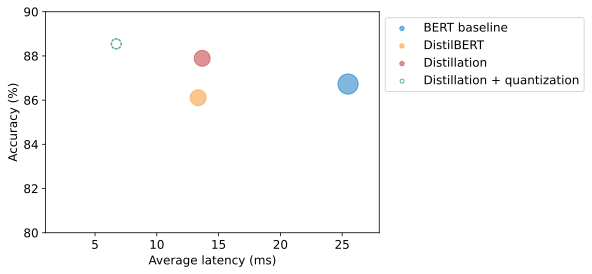

In [58]:
plot_metrics(perf_metrics, optim_type)

# 8.6 ONNXÏôÄ ONNX Îü∞ÌÉÄÏûÑÏúºÎ°ú Ï∂îÎ°† ÏµúÏ†ÅÌôîÌïòÍ∏∞
ONNXÎäî ÌååÏù¥ÌÜ†Ïπò, ÌÖêÏÜåÌîåÎ°úÎ•º ÎπÑÎ°ØÌï¥ Îã§ÏñëÌïú ÌîÑÎ†àÏûÑÏõåÌÅ¨ÏóêÏÑú Îî•Îü¨Îãù Î™®Îç∏ÏùÑ ÎÇòÌÉÄÎÇ¥Í∏∞ ÏúÑÌï¥ Í≥µÌÜµ Ïó∞ÏÇ∞ÏûêÏôÄ Í≥µÌÜµ ÌååÏùº Ìè¨Îß∑ÏùÑ Ï†ïÏùòÌïòÎäî Í≥µÍ∞ú ÌëúÏ§ÄÏù¥Îã§.  
ÏÇ¨Ïù¥ÌÇ∑Îü∞ Í∞ôÏùÄ ÌîÑÎ†àÏûÑÏõåÌÅ¨ÎÇò ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Í∞ôÏùÄ Ï†ÑÌÜµÏ†Å Î®∏Ïã†Îü¨Îãù Î™®Îç∏ÏùÑ ÏúÑÌï¥ ÏÑ§Í≥ÑÎêú ONNX-ML Ïù¥ÎùºÎäî ÌëúÏ§ÄÏù¥ Î≥ÑÎèÑÎ°ú ÏûàÎã§.

ONNX Îü∞ÌÉÄÏûÑ ÎòêÎäî ÏßßÍ≤å Ï§ÑÏó¨ÏÑú ORT Í∞ôÏùÄ Ï†ÑÏö© Í∞ÄÏÜçÍ∏∞ÏôÄ Ìï®Íªò ÏÇ¨Ïö©Ìï† Îïå ÎπõÎÇúÎã§. (Ïù∏Í∏∞ ÏûàÎäî Í∑∏ Ïô∏ Í∞ÄÏÜçÍ∏∞Î°úÎäî NVIDIAÏùò TensorRTÏôÄ ÏïÑÌååÏπòÏùò TVMÏù¥ ÏûàÎã§.)  

ORTÎäî Ïó∞ÏÇ∞Ïûê ÏúµÌï©operator fusionÍ≥º ÏÉÅÏàò Ìè¥Îî©constant folding Í∞ôÏùÄ ONNX Í∑∏ÎûòÌîÑÎ•º ÏµúÏ†ÅÌôîÌïòÎäî ÎèÑÍµ¨Î•º Ï†úÍ≥µÌïúÎã§.  
Í∑∏Î¶¨Í≥† Ïó¨Îü¨ Ï¢ÖÎ•òÏùò ÌïòÎìúÏõ®Ïñ¥ÏóêÏÑú Î™®Îç∏ÏùÑ Ïã§ÌñâÌïòÎèÑÎ°ù 'Ïã§Ìñâ Í≥µÍ∏âÏûêexecution provider'Î•º ÏúÑÌïú Ïù∏ÌÑ∞ÌéòÏù¥Ïä§Î•º Ï†ïÏùòÌïúÎã§. (-> Í∞ïÎ†•Ìïú Ï∂îÏÉÅÌôî)

#### ‚ÄªÏúµÌï©Îêú Ïó∞ÏÇ∞ÏùÄ Ìïú Ïó∞ÏÇ∞Ïûê(ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌôúÏÑ±Ìôî Ìï®Ïàò)Î•º Îã§Î•∏ Ïó∞ÏÇ∞ÏûêÏôÄ Ìï©Ï≥êÏÑú Ïã§ÌñâÌïúÎã§.  
ÏòàÎ•º Îì§Ïñ¥ ÌñâÎ†¨ Í≥±ÏÖà A x BÏóê ÌôúÏÑ±Ìôî Ìï®Ïàò fÎ•º Ï†ÅÏö©ÌïúÎã§Í≥† Í∞ÄÏ†ï.  
ÏùºÎ∞òÏ†ÅÏúºÎ°ú ÌôúÏÑ±ÌôîÎ•º Í≥ÑÏÇ∞ÌïòÍ∏∞ Ï†Ñ, Í≥±ÏÖàÏùò Í≤∞Í≥ºÎ•º GPU Î©îÎ™®Î¶¨Ïóê Îã§Ïãú Ï†ÄÏû•Ìï¥Ïïº ÌïúÎã§.  
Ïó∞ÏÇ∞Ïûê ÏúµÌï©ÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Ìïú Î≤àÏóê f(A x B)Í∞Ä Í≥ÑÏÇ∞ÎêúÎã§.

#### ‚Äª ÏÉÅÏàò Ìè¥Îî©ÏùÄ Ïã§ÌñâÏù¥ ÏïÑÎãàÎùº Ïª¥ÌååÏùº Ïãú ÏÉÅÏàò ÌëúÌòÑÏãùÏùÑ ÌèâÍ∞ÄÌïòÎäî Í≥ºÏ†ïÏùÑ ÏùòÎØ∏ÌïúÎã§.

### ORTÎ•º Ïã§ÌñâÌïòÎ†§Î©¥ Î®ºÏ†Ä Ï†ïÏ†úÎêú Î™®Îç∏ÏùÑ ONNX Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôòÌï¥Ïïº ÌïúÎã§.  
Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§ ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÎäî ÏïÑÎûòÏùò 4Í∞ÄÏßÄ Îã®Í≥ÑÎ°ú Ïù¥ Í≥ºÏ†ïÏùÑ Ï≤òÎ¶¨ÌïòÎäî convert_graph_to_onnx.convert() ÎÇ¥Ïû• Ìï®ÏàòÍ∞Ä ÏûàÎã§.  
1. ÌïòÎÇòÏùò ÌååÏù¥ÌîÑÎùºÏù∏ÏúºÎ°ú Î™®Îç∏ÏùÑ Ï¥àÍ∏∞ÌôîÌïúÎã§.
2. ONNXÍ∞Ä Í≥ÑÏÇ∞ Í∑∏ÎûòÌîÑÎ•º Í∏∞Î°ùÌïòÎèÑÎ°ù placeholder ÏûÖÎ†•ÏúºÎ°ú ÌååÏù¥ÌîÑÎùºÏù∏ÏùÑ Ïã§ÌñâÌïúÎã§.  
-> ‚ÄªÌîåÎ†àÏù¥Ïä§ÌôÄÎçî ÏûÖÎ†•: Î™®Îç∏Ïóê ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Í∞Ä Îì§Ïñ¥Í∞à ÏûêÎ¶¨Î•º ÎØ∏Î¶¨ ÏßÄÏ†ïÌïòÎäî Ïó≠Ìï†
3. ÎèôÏ†Å ÏãúÌÄÄÏä§ Í∏∏Ïù¥Î•º Ï≤òÎ¶¨ÌïòÍ∏∞ ÏúÑÌï¥ ÎèôÏ†ÅÏù∏ Ï∂ïÏùÑ Ï†ïÏùòÌïúÎã§.
4. ÎÑ§Ìä∏ÏõåÌÅ¨ ÌååÎùºÎØ∏ÌÑ∞ÏôÄ Ìï®Íªò Ïù¥ Í∑∏ÎûòÌîÑÎ•º Ï†ÄÏû•ÌïúÎã§.

### Ïù¥ Ìï®ÏàòÎ•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ Î®ºÏ†Ä ONNXÎ•º ÏúÑÌïú OpenMP ÌôòÍ≤Ω Î≥ÄÏàòÎ•º ÏßÄÏ†ïÌïúÎã§.
https://openmp.org

In [59]:
import os
from psutil import cpu_count

os.environ["OMP_NUM_THREADS"] = f"{cpu_count()}" # ONNX Îü∞ÌÉÄÏûÑÏóêÏÑú Î≥ëÎ†¨ Í≥ÑÏÇ∞Ïóê ÏÇ¨Ïö©Ìï† Ïä§Î†àÎìú Í∞úÏàò ÏßÄÏ†ï
os.environ["OMP_WAIT_POLICY"] = "ACTIVE" # ÎåÄÍ∏∞ Ïä§Î†àÎìúÎ•º ÌôúÏÑ± ÏÉÅÌÉúÎ°ú ÏßÄÏ†ï(Ï¶â, CPU ÌîÑÎ°úÏÑ∏ÏÑúÏùò ÏÇ¨Ïù¥ÌÅ¥ÏùÑ ÏÇ¨Ïö©)

### Ï†ïÏ†úÎêú Î™®Îç∏ÏùÑ ONNX Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôòÌïòÍ∏∞

In [60]:
from transformers.convert_graph_to_onnx import convert

# `bh8648`ÏùÑ ÏûêÏã†Ïùò ÌóàÎ∏å ÏÇ¨Ïö©Ïûê Ïù¥Î¶ÑÏúºÎ°ú Î∞îÍæ∏ÏÑ∏Ïöî.
model_ckpt = "bh8648/distilbert-base-uncased-distilled-clinc"
onnx_model_path = Path("onnx/model.onnx")
convert(framework="pt", model=model_ckpt, tokenizer=tokenizer, 
        output=onnx_model_path, opset=12, pipeline_name="text-classification")

/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/convert_graph_to_onnx.py:379: FutureWarning: The `transformers.convert_graph_to_onnx` package is deprecated and will be removed in version 5 of Transformers
  warnings.warn(


ONNX opset version set to: 12
Loading pipeline (model: bh8648/distilbert-base-uncased-distilled-clinc, tokenizer: DistilBertTokenizerFast(name_or_path='bh8648/distilbert-base-uncased-distilled-clinc', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True))
Creating folder onnx
Using framework PyTorch: 2.0.1+cu117
Found input input_ids with shape: {0: 'batch', 1: 'sequence'}
Found input attention_mask with shape: {0: 'batch', 1: 'sequence'}
Found output output_0 with shape: {0: 'batch'}
Ensuring inputs are in correct order
head_mask is not present in the generated input list.
Generated inputs order: ['input_ids', 'attention_mask']


/home/jj/anaconda3/envs/NLP/lib/python3.8/site-packages/transformers/models/distilbert/modeling_distilbert.py:223: TracerWarning: torch.tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  mask, torch.tensor(torch.finfo(scores.dtype).min)


============= Diagnostic Run torch.onnx.export version 2.0.1+cu117 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



conver()Í∞Ä Î≥ÄÌôòÌïòÎäî ÎèôÏïà Ìä∏ÎûúÏä§Ìè¨Î®∏Ïä§Ïùò pipeline() Ìï®ÏàòÎ°ú Î™®Îç∏ÏùÑ Í∞êÏã∏Í∏∞ ÎïåÎ¨∏Ïóê pipeline_name="text-classification" Îß§Í∞úÎ≥ÄÏàòÎ•º ÏßÄÏ†ïÌï¥Ï§òÏïº ÌïúÎã§.  
ONNXÎäî Î≥ÄÍ≤Ω Î∂àÍ∞ÄÎä•Ìïú Ïó∞ÏÇ∞ Í∑úÍ≤©ÏùÑ Í∑∏Î£πÌôîÌïòÍ∏∞ ÏúÑÌï¥ Ïó∞ÏÇ∞Ïûê ÏßëÌï©(operator set)ÏùÑ ÏÇ¨Ïö©ÌïúÎã§. Îî∞ÎùºÏÑú opset=12Îäî ONNX ÎùºÏù¥Î∏åÎü¨Î¶¨Ïùò ÌäπÏ†ï Î≤ÑÏ†ÑÏóê Ìï¥ÎãπÌïúÎã§.

### Î™®Îç∏ÏùÑ Ï†ÄÏû•ÌñàÏúºÎãà Î™®Îç∏Ïóê ÏûÖÎ†•ÏùÑ Ï†ÑÎã¨ÌïòÍ∏∞ ÏúÑÌï¥ InferenceSession Í∞ùÏ≤¥Î•º ÎßåÎì†Îã§.

In [61]:
from onnxruntime import (GraphOptimizationLevel, InferenceSession, SessionOptions)

def create_model_for_provider(model_path, provider="CPUExecutionProvider"):
    options = SessionOptions()
    options.intra_op_num_threads = 1
    options.graph_optimization_level = GraphOptimizationLevel.ORT_ENABLE_ALL
    session = InferenceSession(str(model_path), options, providers=[provider])
    session.disable_fallback()
    return session

In [62]:
onnx_model = create_model_for_provider(onnx_model_path)

### onnx_model.run()ÏùÑ Ìò∏Ï∂úÌï¥ ONNX Î™®Îç∏ÏóêÏÑú ÌÅ¥ÎûòÏä§ Î°úÏßìÏùÑ ÏñªÍ∏∞.
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏Ïóê ÏûàÎäî ÏÉòÌîåÏùÑ ÌïòÎÇò ÏÇ¨Ïö©Ìï¥ ÌÖåÏä§Ìä∏Ìï¥Î≥¥Ïûê.  
  
  convert()Ïùò Ï∂úÎ†•ÏùÄ ONNXÍ∞Ä input_idsÏôÄ attention_maskÎßå ÏûÖÎ†•ÏúºÎ°ú Í∏∞ÎåÄÌïòÎäî Í≤ÉÏùÑ ÏïåÎ†§Ï£ºÎØÄÎ°ú ÏÉòÌîåÏóê ÏûàÎäî label Ïó¥ÏùÄ ÏÇ≠Ï†úÌïúÎã§.

In [63]:
inputs = clinc_enc["test"][:1]

In [64]:
inputs

{'labels': [61],
 'input_ids': [[101, 2129, 2052, 2017, 2360, 4875, 1999, 3059, 102]],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [65]:
del inputs["labels"]

In [66]:
inputs

{'input_ids': [[101, 2129, 2052, 2017, 2360, 4875, 1999, 3059, 102]],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [67]:
logits_onnx = onnx_model.run(None, inputs)[0]
logits_onnx.shape

(1, 151)

In [68]:
logits_onnx

array([[-1.6875741 , -2.4531667 , -1.7708576 , -1.7430799 , -2.6684773 ,
        -1.8909705 , -2.9488482 , -1.5496502 , -1.5673243 , -2.684062  ,
        -2.5739386 , -1.1874859 , -3.3605886 , -1.198247  , -2.8737118 ,
        -2.3759842 , -2.7363362 , -1.7311639 , -2.9470363 , -3.475533  ,
        -1.7077752 , -1.4889345 , -1.6132127 , -1.8189676 , -3.1051145 ,
        -2.513765  , -2.3649263 , -1.963563  , -0.87564296,  1.738919  ,
        -1.9015837 , -1.7204403 , -1.6464992 , -1.2557843 , -2.130134  ,
        -2.3043451 , -1.2544549 , -2.1440635 , -1.300312  , -2.066777  ,
        -1.7339933 , -1.9712014 , -0.45751387, -2.3934526 , -1.9418299 ,
        -2.4505572 , -2.7166972 , -1.5973544 , -2.0243442 , -3.4576583 ,
        -1.6596891 , -1.1518972 , -2.3534207 , -2.1540008 , -3.224942  ,
        -1.344228  , -2.3413548 , -1.8057369 , -3.0153594 , -2.3323803 ,
        -1.6433673 ,  5.469693  , -1.3904761 , -1.5027242 , -3.1057613 ,
        -2.9068298 , -1.9755089 , -1.8424935 , -1.9

Î°úÏßìÏù¥ ÏûàÏúºÎ©¥ argmaxÎ•º Ï†ÅÏö©Ìï¥ ÏâΩÍ≤å ÏòàÏ∏° Î†àÏù¥Î∏îÏùÑ ÏñªÏùÑ Ïàò ÏûàÎã§.

In [69]:
np.argmax(logits_onnx)

61

Ï∂úÎ†•Îêú Í∞íÍ≥º Ï†ïÎãµ Î†àÏù¥Î∏îÏùÑ ÎπÑÍµêÌï¥Î≥¥Ïûê

In [70]:
clinc_enc["test"][0]["labels"]

61

In [71]:
id2label

{0: 'restaurant_reviews',
 1: 'nutrition_info',
 2: 'account_blocked',
 3: 'oil_change_how',
 4: 'time',
 5: 'weather',
 6: 'redeem_rewards',
 7: 'interest_rate',
 8: 'gas_type',
 9: 'accept_reservations',
 10: 'smart_home',
 11: 'user_name',
 12: 'report_lost_card',
 13: 'repeat',
 14: 'whisper_mode',
 15: 'what_are_your_hobbies',
 16: 'order',
 17: 'jump_start',
 18: 'schedule_meeting',
 19: 'meeting_schedule',
 20: 'freeze_account',
 21: 'what_song',
 22: 'meaning_of_life',
 23: 'restaurant_reservation',
 24: 'traffic',
 25: 'make_call',
 26: 'text',
 27: 'bill_balance',
 28: 'improve_credit_score',
 29: 'change_language',
 30: 'no',
 31: 'measurement_conversion',
 32: 'timer',
 33: 'flip_coin',
 34: 'do_you_have_pets',
 35: 'balance',
 36: 'tell_joke',
 37: 'last_maintenance',
 38: 'exchange_rate',
 39: 'uber',
 40: 'car_rental',
 41: 'credit_limit',
 42: 'oos',
 43: 'shopping_list',
 44: 'expiration_date',
 45: 'routing',
 46: 'meal_suggestion',
 47: 'tire_change',
 48: 'todo_list

In [72]:
logits_onnx.max()

5.469693

In [73]:
max(logits_onnx[0])

5.469693

#### ONNX Î™®Îç∏ÏùÄ text-classification ÌååÏù¥ÌîÑÎùºÏù∏Í≥º Ìò∏ÌôòÎêòÏßÄ ÏïäÏúºÎØÄÎ°ú ÌïµÏã¨ ÎèôÏûëÏùÑ ÌùâÎÇ¥ÎÇ¥Îäî ÏÇ¨Ïö©Ïûê Ï†ïÏùò ÌÅ¥ÎûòÏä§Î•º ÎßåÎì§Í≤†Îã§.

In [74]:
from scipy.special import softmax

class OnnxPipeline:
    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer
    
    def __call__(self, query):
        model_inputs = self.tokenizer(query, return_tensors="pt")
        inputs_onnx = {k: v.cpu().detach().numpy()
                       for k, v in model_inputs.items()}
        logits = self.model.run(None, inputs_onnx)[0][0, :]
        probs = softmax(logits)
        pred_idx = np.argmax(probs).item()
        return [{"label": intents.int2str(pred_idx), "score": probs[pred_idx]}]

Í∞ÑÎã®Ìïú ÏøºÎ¶¨Î°ú Ïù¥ ÌÅ¥ÎûòÏä§Î•º ÌÖåÏä§Ìä∏Ìï¥ car_rental ÏùòÎèÑÍ∞Ä Ï∂úÎ†•ÎêòÎäîÏßÄ ÌôïÏù∏

In [75]:
query

"Hey, I'd like to rent a vehicle from Nov 1st to Nov 15th in \nParis and I need a 15 passenger van"

In [76]:
pipe = OnnxPipeline(onnx_model, tokenizer)
pipe(query)

[{'label': 'car_rental', 'score': 0.8823319}]

### ONNX Î™®Îç∏ÏùÑ ÏúÑÌïú ÏÑ±Îä• Î≤§ÏπòÎßàÌÅ¨Î•º ÎßåÎì§Í∏∞.

In [77]:
class OnnxPerformanceBenchmark(PerformanceBenchmark):
    def __init__(self, *args, model_path, **kwargs):
        super().__init__(*args, **kwargs)
        self.model_path = model_path
    
    # Î™®Îç∏ ÌÅ¨Í∏∞Î•º Í≥ÑÏÇ∞Ìï† ÎïåÎäî state_dictÏôÄ torch.save()Ïóê ÏùòÏ°¥ÌïòÏßÄ Î™ªÌïòÎØÄÎ°ú compute_size() Î©îÏÑúÎìúÎßå Ïò§Î≤ÑÎùºÏù¥Îî©
    # (onnx_modelÏù¥ Í∏∞Ïà†Ï†ÅÏúºÎ°ú ÌååÏù¥ÌÜ†ÏπòÏùò nn.ModuleÏùò ÏÜçÏÑ±Ïóê Ï†ëÍ∑ºÌïòÏßÄ Î™ªÌïòÎäî ONNX InferenceSession Í∞ùÏ≤¥Ïù¥Í∏∞ ÎïåÎ¨∏)
    def compute_size(self):
        size_mb = Path(self.model_path).stat().st_size / (1024 * 1024)
        print(f"Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - {size_mb:.2f}")
        return {"size_mb": size_mb}

ÏÉàÎ°úÏö¥ Î≤§ÏπòÎßàÌÅ¨ ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©Ìï¥ Ï†ïÏ†ú Î™®Îç∏Ïù¥ ONNX Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôòÎêêÏùÑ Îïå ÏÑ±Îä•ÏùÑ ÌôïÏù∏Ìï¥Î≥¥Ïûê

In [78]:
optim_type = "Distillation + ORT"
pb = OnnxPerformanceBenchmark(pipe, clinc["test"], optim_type,
                               model_path="onnx/model.onnx")
perf_metrics.update(pb.run_benchmark())

Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - 255.98
ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - 14.85 +\- 0.20
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - 0.879


/tmp/ipykernel_1484/1299828502.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


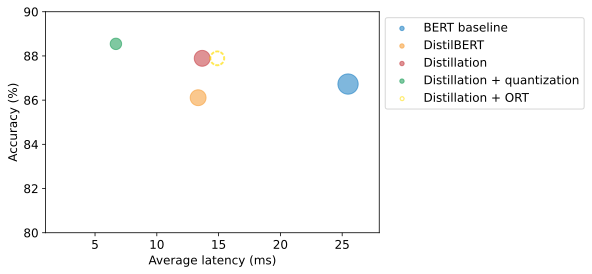

In [79]:
plot_metrics(perf_metrics, optim_type)

ÏõêÎûòÎäî Distillation + ORTÍ∞Ä Îπ®Í∞Ñ ÏõêÏùò ÏôºÏ™ΩÏóê ÏúÑÏπòÌï¥ÏÑú Î†àÏù¥ÌÑ¥ÏãúÍ∞Ä Ï°∞Í∏à Ìñ•ÏÉÅÎêòÎäîÎìØ Ìï®.  
... Î≠îÎç∞? ÎπÑÏä∑ÌïòÍ∏¥ ÌïúÎç∞ Ïôú ONNX Ìè¨Îß∑Ïù¥ Ï¢Ä Îçî ÎäêÎ†§Ï°åÏßÄ...  
Ìïú Î≤à Í∞ÄÏßÄÍ≥† ÌåêÎã®ÌïòÍ∏¥ Ï¢Ä Í∑∏Î†áÍ≥† Îã§Ïãú ÎèåÎ¶¨Í∏¥ Í∑ÄÏ∞ÆÏùå

#### Ïù¥Ï†ú ÏñëÏûêÌôîÎ•º Ï∂îÍ∞ÄÌï¥ ÏÑ±Îä•ÏùÑ Ï∂îÍ∞ÄÎ°ú Ïò¨Î†§Î≥¥Ïûê.

#### ÌååÏù¥ÌÜ†ÏπòÏôÄ ÎπÑÏä∑ÌïòÍ≤å, ORTÎäî Î™®Îç∏ÏùÑ ÏñëÏûêÌôîÌïòÍ∏∞ ÏúÑÌï¥ ÏÑ∏ Í∞ÄÏßÄ Î∞©Î≤ï Ï†úÍ≥µ.  
1) ÎèôÏ†Å ÏñëÏûêÌôî
2) Ï†ïÏ†Å ÏñëÏûêÌôî
3) ÏñëÏûêÌôîÎ•º Í≥†Î†§Ìïú ÌõàÎ†®

### ÌååÏù¥ÌÜ†ÏπòÏóêÏÑú ÌñàÎçò Í≤ÉÏ≤òÎüº Ï†ïÏ†ú Î™®Îç∏Ïóê ÎèôÏ†Å ÏñëÏûêÌôîÎ•º Ï†ÅÏö©ÌïòÍ≤†Îã§.

### ortÏóêÏÑú ÏñëÏûêÌôîÎäî quantize_dynamic() Ìï®ÏàòÎ•º ÌÜµÌï¥ ÏàòÌñâÌïúÎã§.
-> Ïù¥ Ìï®ÏàòÏóêÎäî ÏñëÏûêÌôîÌï† ONNX Î™®Îç∏ Í≤ΩÎ°ú, ÏñëÏûêÌôîÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï† ÌÉÄÍπÉ Í≤ΩÎ°ú, Í∞ÄÏ§ëÏπòÎ•º Ï∂ïÏÜåÌï† Îç∞Ïù¥ÌÑ∞ ÌÉÄÏûÖÏùÑ Ï†ÑÎã¨ÌïúÎã§.

In [80]:
from onnxruntime.quantization import quantize_dynamic, QuantType

model_input = "onnx/model.onnx"
model_output = "onnx/model.quant.onnx"
quantize_dynamic(model_input, model_output, weight_type=QuantType.QInt8)

Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.0/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.0/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.1/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.1/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.2/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.2/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.3/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.3/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.4/attention/MatMul]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.4/attention/MatMul_1]
Ignore MatMul due to non constant B: /[/distilbert/transformer/layer.5/attention/MatMul]
Ignore MatM

### Î™®Îç∏ÏùÑ ÏñëÏûêÌôîÌñàÏúºÎãà Îã§Ïãú Î≤§ÏπòÎßàÌÅ¨ Ïã§Ìñâ

In [81]:
onnx_quantized_model = create_model_for_provider(model_output)
pipe = OnnxPipeline(onnx_quantized_model, tokenizer)
optim_type = "Distillation + ORT(quantized)"
pb = OnnxPerformanceBenchmark(pipe, clinc["test"], optim_type,
                              model_path=model_output)
perf_metrics.update(pb.run_benchmark())

Î™®Îç∏ ÌÅ¨Í∏∞ (MB) - 64.33
ÌèâÍ∑† Î†àÏù¥ÌÑ¥Ïãú (ms) - 8.48 +\- 0.21
ÌÖåÏä§Ìä∏ ÏÑ∏Ìä∏ Ï†ïÌôïÎèÑ - 0.889


/tmp/ipykernel_1484/1299828502.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


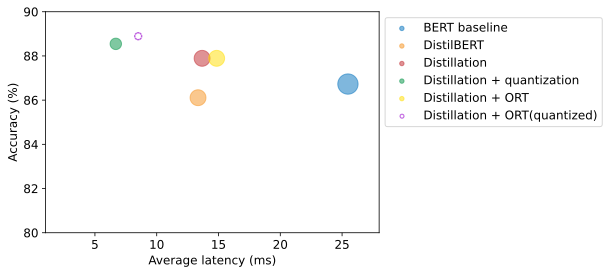

In [82]:
plot_metrics(perf_metrics, optim_type)

ÎÇ¥Í∞Ä ORTÎ•º Î≠ê ÏûòÎ™ªÌñàÎÇò Ïôú ORT Ï†ÅÏö©Ìïú Î™®Îç∏Îì§Ïù¥ Ï°∞Í∏à Îçî ÎäêÎ¶¨ÏßÄ?  
ÏõêÎûòÎäî ÎÖ∏ÎûÄÍ≤å Îπ®Í∞ÑÍ±∞ ÏôºÏ™Ω, Î≥¥ÎùºÏÉâÏù¥ Ï¥àÎ°ùÏÉâ ÏôºÏ™ΩÏóê ÏûàÏñ¥Ïïº Ìï®...  
Ìù†Ìù†

\<chatGPT>  
ORTÏ†ÅÏö©Ìïú Î™®Îç∏Ïù¥ ÏïÑÎãå Î™®Îç∏Î≥¥Îã§ Î≥¥Îã§ ÌèâÍ∑† ÏßÄÏó∞ ÏãúÍ∞Ñ(latency)Ïù¥ Îçî Ïò§Îûò Í±∏Î¶¨Îäî Ïù¥Ïú†Îäî Îã§ÏùåÍ≥º Í∞ôÏùÑ Ïàò ÏûàÏäµÎãàÎã§:

Î™®Îç∏ Î≥ÄÌôòÏùò Ïò§Î≤ÑÌó§Îìú: Î™®Îç∏ÏùÑ ONNX Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôòÌïòÎäî Í≥ºÏ†ïÏùÄ Ï∂îÍ∞ÄÏ†ÅÏù∏ Í≥ÑÏÇ∞ Î∞è Î≥ÄÌôò Ïò§Î≤ÑÌó§ÎìúÍ∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Îü¨Ìïú Ïò§Î≤ÑÌó§ÎìúÍ∞Ä ÌèâÍ∑† ÏßÄÏó∞ ÏãúÍ∞ÑÏùÑ Ï¶ùÍ∞ÄÏãúÌÇ¨ Ïàò ÏûàÏäµÎãàÎã§.

Î™®Îç∏ ÏïÑÌÇ§ÌÖçÏ≤ò: ONNX Ìè¨Îß∑ÏúºÎ°ú Î≥ÄÌôòÎêú Î™®Îç∏ cÎäî ÏõêÎûò Î™®Îç∏ bÏôÄ Îã§Î•∏ ÏïÑÌÇ§ÌÖçÏ≤òÎ•º Í∞ÄÏßÄÍ≥† ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Î°ú Ïù∏Ìï¥ Î™®Îç∏ Ïã§Ìñâ ÏÜçÎèÑÏóê Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏäµÎãàÎã§.

Îü∞ÌÉÄÏûÑ ÌôòÍ≤Ω: ONNX Îü∞ÌÉÄÏûÑ(ORT)ÏùÄ Î™®Îç∏ÏùÑ Ïã§ÌñâÌïòÎäî Îç∞ ÏÇ¨Ïö©ÎêòÎäî ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§. Îü∞ÌÉÄÏûÑÏùò Íµ¨ÌòÑÏóê Îî∞Îùº ÏÑ±Îä• Ï∞®Ïù¥Í∞Ä Î∞úÏÉùÌï† Ïàò ÏûàÏúºÎ©∞, Ïù¥Î°ú Ïù∏Ìï¥ cÏùò ÏÑ±Îä•Ïù¥ bÎ≥¥Îã§ ÎäêÎ¶¥ Ïàò ÏûàÏäµÎãàÎã§.

ÌïòÎìúÏõ®Ïñ¥ ÌôòÍ≤Ω: Î™®Îç∏ÏùÑ Ïã§ÌñâÌïòÎäî ÌôòÍ≤ΩÏóê Îî∞Îùº ÏÑ±Îä•Ïù¥ Îã¨ÎùºÏßà Ïàò ÏûàÏäµÎãàÎã§. Ï¶â, cÎ•º Ïã§ÌñâÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÎäî ÌïòÎìúÏõ®Ïñ¥Í∞Ä bÎ•º Ïã§ÌñâÌïòÎäîÎç∞ ÏÇ¨Ïö©ÎêòÎäî ÌïòÎìúÏõ®Ïñ¥ÏôÄ Îã§Î•º Ïàò ÏûàÏäµÎãàÎã§.

# 8.7 Í∞ÄÏ§ëÏπò Í∞ÄÏßÄÏπòÍ∏∞Î°ú sparse model ÎßåÎì§Í∏∞
ÏßÄÏãù Ï†ïÏ†úÏôÄ Í∞ÄÏ§ëÏπò ÏñëÏûêÌôîÎäî Ï∂îÎ°† ÏÜçÎèÑÍ∞Ä Îπ†Î•∏ Î™®Îç∏ÏùÑ ÎßåÎìúÎäî Îç∞ Ìö®Í≥ºÏ†ÅÏù¥Îã§.  
Í≤ΩÏö∞Ïóê Îî∞ÎùºÏÑúÎäî Î™®Îç∏Ïùò Î©îÎ™®Î¶¨ ÏÇ¨Ïö©ÎüâÏù¥ Í∞ïÎ†•Ìûà Ï†úÌïúÎê† ÎïåÎèÑ ÏûàÎã§.(Î™®Î∞îÏùº Ïû•ÏπòÏóê ÏÇΩÏûÖÌïòÎäî Ïñ¥Ìîå Îì±)  
Ïù¥Îü¨Ìïú Í≤ΩÏö∞ Î∂ÑÎ•òÍ∏∞Í∞Ä Í∞ÄÎä•Ìïú ÏûëÏùÄ Í≥µÍ∞ÑÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§.  
#### -> Ïã†Í≤ΩÎßùÏóêÏÑú Í∞ÄÏû• Îçú Ï§ëÏöîÌïú Í∞ÄÏ§ëÏπòÎ•º Ï∞æÏïÑ Ï†úÍ±∞ÌïòÎäî Î∞©ÏãùÏúºÎ°ú Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞ Í∞úÏàòÎ•º Ï§ÑÏù¥Îäî Î∞©Î≤ï

## 8.7.1 Ïã¨Ï∏µ Ïã†Í≤ΩÎßùÏùò Ìù¨ÏÜåÏÑ±
Í∞ÄÏßÄÏπòÍ∏∞Ïùò Í∏∞Î≥∏ Í∞úÎÖê -> ÌõàÎ†®ÌïòÎäî ÎèôÏïà Í∞ÄÏ§ëÏπò Ïó∞Í≤∞ÏùÑ(Í∑∏Î¶¨Í≥† Ïû†Ïû¨Ï†ÅÏúºÎ°ú Îâ¥Îü∞ÏùÑ) Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï†úÍ±∞Ìï¥ Î™®Îç∏ÏùÑ Ìù¨ÏÜåÌïòÍ≤å ÎßåÎìúÎäî Í≤É

Ïù¥Î†áÍ≤å ÎßåÎì§Ïñ¥ÏßÑ Í∞ÄÏßÄÏπòÍ∏∞Îêú Î™®Îç∏ÏùÄ 0Ïù¥ ÏïÑÎãå ÌååÎùºÎØ∏ÌÑ∞Ïùò Í∞úÏàòÍ∞Ä Îçî Ï†ÅÏñ¥ Ìù¨ÏÜå ÌñâÎ†¨ Ìè¨Îß∑ÏúºÎ°ú Ï†ÄÏû•ÎêúÎã§.  
Í∞ÄÏßÄÏπòÍ∏∞Îäî ÏñëÏûêÌôîÏôÄ Ìï®Íªò ÏÇ¨Ïö©ÌïòÎ©¥ Ï∂îÍ∞Ä ÏïïÏ∂ïÏù¥ Í∞ÄÎä•ÌïòÎã§.

## 8.7.2 Í∞ÄÏ§ëÏπò Í∞ÄÏßÄÏπòÍ∏∞ Î∞©Î≤ï
ÏàòÌïôÏ†ÅÏúºÎ°ú ÎåÄÎ∂ÄÎ∂ÑÏùò Í∞ÄÏ§ëÏπò Í∞ÄÏßÄÏπòÍ∏∞ Î∞©Î≤ïÏù¥ ÎèôÏûëÌïòÎäî Î∞©ÏãùÏùÄ Ï§ëÏöîÎèÑ Ï†êÏàò(importance score) ÌñâÎ†¨ SÎ•º Í≥ÑÏÇ∞ÌïòÍ≥† Ï§ëÏöîÎèÑ ÏàúÏúºÎ°ú ÏµúÏÉÅÏúÑ k%Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏÑ†ÌÉùÌïòÎäî Í≤ÉÏù¥Îã§.  
  
ÏÇ¨Ïã§ÏÉÅ kÎäî Î™®Îç∏Ïùò Ìù¨ÏÜåÏÑ± Ïñë, Ï¶â Í∞íÏù¥ 0Ïù∏ Í∞ÄÏ§ëÏπò ÎπÑÏú®ÏùÑ Ï†úÏñ¥ÌïòÎäî ÏÉàÎ°úÏö¥ ÌïòÏù¥ÌçºÌååÎ¶¨ÎØ∏ÌÑ∞ Ïó≠Ìï†ÏùÑ ÌïúÎã§. -> kÍ∞íÏù¥ ÎÇÆÏùÑÏàòÎ°ù ÌñâÎ†¨ÏùÄ Îçî Ìù¨ÏÜåÌï¥Ïßê  
  
Í∑∏Îã§Ïùå Ïù¥ Ï†êÏàòÎ•º ÏÇ¨Ïö©Ìï¥ ÎßàÏä§ÌÅ¨ ÌñâÎ†¨(mask matrix) MÏùÑ ÎßåÎì†Îã§.  
Ïù¥ ÌñâÎ†¨ÏùÄ Ï†ïÎ∞©Ìñ• Ìå®Ïä§ÏóêÏÑú ÏûÖÎ†• x_iÏóê Í≥±Ìï¥ÏßÄÎäî Í∞ÄÏ§ëÏπò W_ijÎ•º ÎßàÏä§ÌÇπÌïòÏó¨ Ìù¨ÏÜåÌïú ÌôúÏÑ±Ìï®Ïàò a_iÎ•º ÎßåÎì†Îã§.

 #### Í∞ÄÏßÄÏπòÍ∏∞ Î∞©Î≤ïÏùÄ Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï§ëÏöî ÏßàÎ¨∏ÏùÑ Í≥†Î†§Ìï¥Ïïº ÌïúÎã§.
 1. Ïñ¥Îñ§ Í∞ÄÏ§ëÏπòÎ•º ÏÇ≠Ï†úÌï¥Ïïº Ìï†ÏßÄ
 2. ÏµúÏÉÅÏùò ÏÑ±Îä•ÏùÑ ÎÇ¥Î†§Î©¥ ÎÇ®ÏùÄ Í∞ÄÏ§ëÏπòÎ•º Ïñ¥ÎñªÍ≤å Ï°∞Ï†ïÌï¥Ïïº Ìï†ÏßÄ
 3. Ïù¥Îü∞ Í∞ÄÏßÄÏπòÍ∏∞ Í≥ÑÏÇ∞ÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏàòÌñâÌïòÎäî Î∞©Î≤ïÏùÄ Î≠òÏßÄ

### Ï†àÎåìÍ∞í Í∞ÄÏßÄÏπòÍ∏∞(magnitude pruning)
-> Í∞ÄÏ§ëÏπò Ï†àÎåìÍ∞í ÌÅ¨Í∏∞Ïóê Îî∞Îùº Ï†êÏàòÎ•º Í≥ÑÏÇ∞ÌïúÎã§.  
-> Í∑∏Îã§Ïùå ÎßàÏä§ÌÅ¨Î•º ÎßåÎì†Îã§. M = Top_k(S)  
-> ÎÖºÎ¨∏ÏóêÏÑúÎäî Î®ºÏ†Ä Ïñ¥Îñ§ Í∞ÄÏ§ëÏπòÍ∞Ä Ï§ëÏöîÌïúÏßÄ ÌïôÏäµÌïòÎèÑÎ°ù Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† Í∞ÄÏû• Îçú Ï§ëÏöîÌïú Í∞ÄÏ§ëÏπòÎ•º Í∞ÄÏßÄÏπòÍ∏∞ ÌïòÎäî ÏãùÏúºÎ°ú Î∞òÎ≥µÏ†ÅÏúºÎ°ú Ï†àÎåìÍ∞í Í∞ÄÏßÄÏπòÍ∏∞Î•º ÌïòÎäî Í≤ΩÏö∞Í∞Ä ÏùºÎ∞òÏ†ÅÏù¥Îã§.  
-> Í∑∏Îã§Ïùå ÏõêÌïòÎäî Ìù¨ÏÜåÏÑ±Ïóê ÎèÑÎã¨Ìï† ÎñÑÍπåÏßÄ Ìù¨ÏÜåÌïú Î™®Îç∏ÏùÑ ÌõàÎ†®ÌïòÍ≥† Ïù¥ Í≥ºÏ†ïÏùÑ Î∞òÎ≥µÌïúÎã§.

Ïù¥ Î∞©ÏãùÏùò Îã®Ï†êÏùÄ Í≥ÑÏÇ∞ÎüâÏù¥ ÎßéÎã§Îäî Í≤ÉÏù¥Îã§. (Í∞ÄÏßÄÏπòÍ∏∞ Îß§ Îã®Í≥ÑÎßàÎã§ Î™®Îç∏ÏùÑ ÌõàÎ†®Ìï¥ ÏàòÎ†¥ÏãúÏºúÏïº Ìï®)  
Îî∞ÎùºÏÑú Î≥¥ÌÜµ Ìù¨ÏÜåÏÑ± Ï¥àÍπÉÍ∞í s_iÎ•º ÏùºÏ†ï Îã®Í≥Ñ N ÌõÑÏóê ÏµúÏ¢Ö Í∞íÏúºÎ°ú Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞ÄÏãúÌÇ§Îäî Ìé∏Ïù¥ ÎÇ´Îã§.

Ïù¥ Í∞ÄÏßÄÏπòÍ∏∞Ïùò Í∞úÎÖêÏùÄ  
-> Œît Ïä§ÌÖùÎßàÎã§ Ïù¥ÏßÑ ÎßàÏä§ÌÅ¨ MÏùÑ ÏóÖÎç∞Ïù¥Ìä∏Ìï¥ / ÌõàÎ†®ÌïòÎäî ÎèôÏïà ÎßàÏä§ÌÇπÎêú Í∞ÄÏ§ëÏπòÎ•º Îã§Ïãú ÌôúÏÑ±ÌôîÌïòÍ≥† / Í∞ÄÏßÄÏπòÍ∏∞Î°ú Ïù∏Ìï¥ Î∞úÏÉùÌï†ÏßÄ Î™®Î•º Ïû†Ïû¨Ï†ÅÏù∏ Ï†ïÌôïÎèÑ ÏÜêÏã§ÏùÑ Î≥µÍµ¨ÌïòÎäî Í≤É.  
-> ÏÑ∏Ï†úÍ≥± Ìï≠ÏùÄ Í∞ÄÏ§ëÏπò Í∞ÄÏßÄÏπòÍ∏∞Ïùò ÏÜçÎèÑÍ∞Ä (Ï§ëÎ≥µÎêú Í∞ÄÏ§ëÏπòÍ∞Ä ÎßéÏùÄ) Ï¥àÍ∏∞ Îã®Í≥ÑÏóê Í∞ÄÏû• ÎÜíÍ≥† Í∑∏ÌõÑ Ï†êÏ∞® Í∞êÏÜåÌïúÎã§Îäî ÏùòÎØ∏Îã§.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

def _sparsity(t, t_0=0, dt=1, s_i=0, s_f=0.9, N=100):
    return s_f + (s_i - s_f) * (1 - (t - t_0) / (N * dt))**3

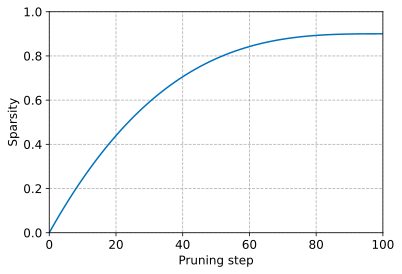

In [85]:
steps = np.linspace(0, 100, 100)
values = [_sparsity(t) for t in steps]

fig, ax = plt.subplots()
ax.plot(steps, values)
ax.set_ylim(0, 1)
ax.set_xlim(0, 100)
ax.set_xlabel("Pruning step") # Ìù¨ÏÜåÏÑ±Ïù¥ ÎÜíÏïÑÏßÑÎã§ = Î™®Îç∏Ïùò Í∞ÄÏ§ëÏπòÎ•º Îçî ÎßéÏù¥ ÏïàÏì¥Îã§. Í∑∏ÎûòÏÑú Í≥°ÏÑ†Ïù¥ ÏôÑÎßåÌï¥Ïßê
ax.set_ylabel("Sparsity")
plt.grid(linestyle="dashed")
plt.show()

Ï†àÎåìÍ∞í Í∞ÄÏßÄÏπòÍ∏∞Îäî Í∞Å Í∞ÄÏ§ëÏπòÏùò Ï§ëÏöîÎèÑÍ∞Ä ÌòÑÏû¨ ÏûëÏóÖÍ≥º ÏßÅÏ†ëÏ†ÅÏúºÎ°ú Í¥ÄÎ†®Îêú ÏàúÏàòÌïú ÏßÄÎèÑ ÌïôÏäµÏùÑ ÏúÑÌï¥ Í≥†ÏïàÎêêÎã§Îäî Î¨∏Ï†úÍ∞Ä ÏûàÎã§.  
#### Ïù¥ÏôÄ Îã¨Î¶¨ Ï†ÑÏù¥ ÌïôÏäµÏóêÏÑúÎäî Í∞ÄÏ§ëÏπòÏùò Ï§ëÏöîÎèÑÍ∞Ä Ï£ºÎ°ú ÏÇ¨Ï†Ñ ÌõàÎ†® Îã®Í≥ÑÏóêÏÑú Í≤∞Ï†ïÎêúÎã§.  
Îî∞ÎùºÏÑú Ï†àÎåìÍ∞í Í∞ÄÏßÄÏπòÍ∏∞Î°ú Ïù∏Ìï¥ ÎØ∏ÏÑ∏ ÌäúÎãù ÏûëÏóÖÏóêÏÑú Ï§ëÏöîÌïú Í∞ÄÏ§ëÏπòÍ∞Ä ÏÇ≠Ï†úÎê† ÏàòÎèÑ ÏûàÎã§. -> Ïù¥Îü¨Ìïú Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥ Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞Í∞Ä Ï†úÏïàÎê®

### Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞(movement pruning)
Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞Ïùò Í∏∞Î≥∏ Í∞úÎÖêÏùÄ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎäî ÎèôÏïà Ï†êÏßÑÏ†ÅÏúºÎ°ú Í∞ÄÏ§ëÏπòÎ•º Ï†úÍ±∞Ìï¥ Î™®Îç∏ÏùÑ Ï†êÏ∞® Ìù¨ÏÜåÌïòÍ≤å ÎßåÎìúÎäî Í≤É.  

Ïù¥ Î∞©ÏãùÏùò ÏÉàÎ°úÏö¥ Ï†êÏùÄ ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎäî ÎèôÏïà Í∞ÄÏ§ëÏπòÏôÄ Ï†êÏàòÍ∞Ä Î™®Îëê ÌïôÏäµÎêúÎã§Îäî Í≤ÉÏù¥Îã§.  
Îî∞ÎùºÏÑú Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞ÏóêÏÑúÎäî Ï†êÏàòÎ•º Í∞ÄÏ§ëÏπòÏóêÏÑú Î∞îÎ°ú Íµ¨ÌïòÏßÄ ÏïäÍ≥† ÏûÑÏùòÏ†ÅÏù¥Î©∞ Ïã†Í≤ΩÎßùÏùò Îã§Î•∏ ÌååÎùºÎØ∏ÌÑ∞Ï≤òÎüº Í≤ΩÏÇ¨ ÌïòÍ∞ïÎ≤ïÏùÑ ÌÜµÌï¥ ÌïôÏäµÌïúÎã§. -> Ï¶â Ïó≠Î∞©Ìñ• Ìå®Ïä§ÏóêÏÑú Ï†êÏàò S_ijÏóê ÎåÄÌïú ÏÜêÏã§ LÏùò Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏ÎèÑ Ï∂îÏ†ÅÌïúÎã§.

Ï†êÏàòÎ•º ÌïôÏäµÌïòÍ≥† ÎÇòÎ©¥ M = Top_k(S)Î•º ÌÜµÌï¥ Ïù¥ÏßÑ ÎßàÏä§ÌÅ¨Î•º ÏÉùÏÑ±ÌïòÍ∏∞Îäî ÏâΩÎã§.  
‚Äª ÏµúÏÉÅÏúÑ k%Ïùò Í∞ÄÏ§ëÏπòÎ•º ÏÑ†ÌÉùÌïòÎäî ÎåÄÏã† Ï†ÑÏó≠ ÏûÑÍ≥óÍ∞í(global thresholding; œÑ)ÏùÑ ÏÇ¨Ïö©Ìï¥ Ïù¥ÏßÑÎßàÏä§ÌÅ¨ M = (S > œÑ)Î•º Ï†ïÏùòÌïòÎäî Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞Ïùò ÏÜåÌîÑÌä∏ Î≤ÑÏ†ÑÎèÑ ÏûàÏùå.

Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞ Í∞úÎÖêÏóêÏÑúÎäî ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú -> ÏõêÏ†êÏúºÎ°úÎ∂ÄÌÑ∞ Í∞ÄÏû• ÌÅ¨Í≤å Ïù¥ÎèôÌïòÎäî Í∞ÄÏ§ëÏπòÍ∞Ä Í∞ÄÏû• Ï§ëÏöîÌïòÎã§. -> Ï¶â, ÎØ∏ÏÑ∏ ÌäúÎãùÌïòÎäî ÎèôÏïà 'ÏñëÏùò Í∞ÄÏ§ëÏπò'Í∞Ä Ï¶ùÍ∞ÄÌïúÎã§.(Í∑∏Î¶¨Í≥† ÏùåÏùò Í∞ÄÏ§ëÏπòÎäî Î∞òÎåÄÎ°ú Ï§ÑÏñ¥Îì†Îã§.)  
#### -> Ïù¥Îäî Í∞ÄÏ§ëÏπòÍ∞Ä ÏõêÏ†êÏóêÏÑú Î©ÄÏñ¥ÏßàÏàòÎ°ù Ï†êÏàòÍ∞Ä Ï¶ùÍ∞ÄÌïúÎã§Îäî ÎßêÍ≥º Í∞ôÎã§.
‚Äª Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞ÏóêÏÑú Ï†êÏàò S_ijÏóê ÎåÄÌïú ÏÜêÏã§Ïùò Í∑∏Î†àÏù¥ÎîîÏñ∏Ìä∏Í∞Ä 0Î≥¥Îã§ ÏûëÏùÄ Í≤ΩÏö∞, Ï†êÏàò S_ijÍ∞Ä Ï¶ùÍ∞ÄÌïúÎã§. Ïù¥Îäî Í∞ÄÏ§ëÏπò W_ijÍ∞Ä ÏõêÏ†êÏóêÏÑú Î©ÄÏñ¥ÏßÑÎã§Îäî ÏùòÎØ∏Îã§.

Ï†àÎåìÍ∞í Í∞ÄÏßÄÏπòÍ∏∞Ïùò Í≤ΩÏö∞ ÏÇ¨Ï†Ñ ÌõàÎ†®Îêú Í∞ÄÏ§ëÏπò Í∞íÏù¥ ÎØ∏ÏÑ∏ ÌäúÎãùÏùò Í∞ÄÏßÄÏπòÍ∏∞Ïóê ÌÅ∞ ÏòÅÌñ•ÏùÑ ÎØ∏Ï≥ê ÏõêÏ†êÏóêÏÑú Í∞ÄÏû• Î©ÄÎ¶¨ ÏûàÎäî Í∞ÄÏ§ëÏπòÎì§Îßå ÏÑ†ÌÉùÌïòÏßÄÎßå,  
Ïù¥Îèô Í∞ÄÏßÄÏπòÍ∏∞ÏóêÏÑúÎäî Ï†Ñ ÏòÅÏó≠ÏóêÏÑú Í≥†Î•¥Í≤å Í∞ÄÏßÄÏπòÍ∏∞ ÎêúÎã§.

### Í∞ÄÏßÄÏπòÍ∏∞ Î∞©Î≤ïÏùÄ nn_pruning ÎùºÏù¥Î∏åÎü¨Î¶¨ ÌôïÏù∏ ÎòêÎäî ÌóàÍπÖÌéòÏù¥Ïä§Ïóê Í∞ÄÏÑú pruning Î¨∏ÏÑú Í≤ÄÏÉâ